## Bussiness Problem

**Description of the Project:**

- The database provided includes the players data for the Career Mode from FIFA 15 to FIFA 20.
- The data allows multiple comparisons of the same players across the last 6 versions of the videogame.
- This dataset is used in various contexts, including gaming, sports management, and analytics.
- **Gaming Industry:** Developers like EA Sports, players, and esports organizations.
- **Football Clubs and Scouts:** Teams using data for recruitment and performance analysis.
- **Sports Analysts:** Professionals analyzing player metrics and trends.
- **Fantasy Football Platforms:** Leveraging data to enhance virtual team-building experiences.
- **Marketers and Sponsors:** Utilizing insights for targeted campaigns and sponsorship deals.
- We aim to cluster the data based on the skill attributes provided in the dataset.

## Domain Analysis

- The FIFA 20 dataset belongs to the domain of sports analytics and gaming, specifically focusing on football (soccer).
- FIFA 20 is a football simulation video game published by Electronic Arts as part of the FIFA series
- It provides a virtual representation of real-world players, offering detailed information on attributes, performance metrics, and market values.
- One of the main aspects of FIFA 20 gameplay that we wanted to emphasize is within one-on-one situations.
- Due to the re-architecture of our Positioning system, players should find themselves in one-on-one battles, all over the pitch, more often in FIFA 20.
- Both the dribbler and the defender will have more time and space to read the play and show their skills than ever before - be it a winger trying to break through the defense, or a holding midfielder closing down a deadly striker - these are some of the moments that can define the advantage in a balanced match.
- Additionally, our goal for FIFA 20 is to provide gameplay that allows you to read and predict, rather than a game where you only react to your opponent.
- Strategy and overall understanding of football are key.
- In real-life football, some of the most exciting moments derive from these types of situations, and we wanted to shine a spotlight on them.


In [1329]:
## Importing the required libraries for the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from PIL import Image
import plotly.graph_objs as go
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
import plotly.graph_objs as go
from yellowbrick.cluster import KElbowVisualizer

#performance metrics
from sklearn.metrics import silhouette_score, silhouette_samples

#warnings
import warnings
warnings.filterwarnings('ignore')

#setting notebook style
sns.set_style('darkgrid')
pd.set_option("display.max_columns",None)


In [1493]:
## Load the dataset from the csv to dataframe

players_data = pd.read_csv(r"C:/Users/Prathibha/Downloads/PRCP-1004-Fifa20/Data/players_20.csv")
players_data.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        170         72   Argentina         FC Barcelona       94         94   
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   
3        188         87    Slovenia      Atlético Madrid       91         93   
4        175         74     Belgium          Real Madrid       91         91   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   
4   90000000    470000           LW, CF          Right   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   
4                         4          4            4    High/Medium   

    body_type real_face  release_clause_eur  \
0       Messi       Yes         195800000.0   
1  C. Ronaldo       Yes          96500000.0   
2      Neymar       Yes         195200000.0   
3      Normal       Yes         164700000.0   
4      Normal       Yes         184500000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                NaN            GK   
4                    #Speedster, #Dribbler, #Acrobat            LW   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   
1                 7.0         NaN  2018-07-10                2022.0   
2                10.0         NaN  2017-08-03                2022.0   
3                13.0         NaN  2014-07-16                2023.0   
4                 7.0         NaN  2019-07-01                2024.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   
1              LS                   7.0  90.0      93.0     82.0       89.0   
2              LW                  10.0  91.0      85.0     87.0       95.0   
3              GK                   1.0   NaN       NaN      NaN        NaN   
4              LF                  10.0  91.0      83.0     86.0       94.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   
1       35.0    78.0        NaN          NaN         NaN          NaN   
2       32.0    58.0        NaN          NaN         Na

***Description of every feature available in the dataset:***


**Basic Player Information:**

- sofifa_id:	Unique ID for the player in the SoFIFA database.
- player_url:	URL to the player’s page on the SoFIFA website.
- short_name:	Player's commonly used name.
- long_name:	Full name of the player.
- age:	Player’s age (in years).
- dob:	Date of birth of the player.
- height_cm:	Player’s height in centimeters.
- weight_kg:	Player’s weight in kilograms.
- nationality:	Country the player represents.
- club:	Club the player is associated with.


**Performance and Value:**

- overall:	Overall skill rating of the player (out of 100).
- potential:	Maximum skill rating the player can achieve.
- value_eur:	Player's estimated market value in euros.
- wage_eur:	Weekly wage of the player in euros.
- player_positions:	Primary and secondary positions the player can play.
- preferred_foot:	Player’s preferred foot (left or right).
- international_reputation:	Global recognition level (rating from 1-5).
- weak_foot:	Skill rating (1-5) of the player’s weaker foot.
- skill_moves:	Ability to perform skill moves (rating from 1-5).<---
- work_rate:	Work rate for attacking and defensive roles (e.g., High/Medium).
- body_type:	Physical build description (e.g., Lean, Stocky).
- real_face:	Indicates whether the player's face is digitally realistic in the game.
- release_clause_eur:	The buyout fee to acquire the player, in euros.


**Team Information:**

- player_tags:	Tags associated with the player (e.g., "Wonderkid").
- team_position:	Current role or position in the team (e.g., Sub, Starting XI).
- team_jersey_number:	Jersey number assigned to the player in their club.
- loaned_from:	Parent club, if the player is on loan.
- joined:	Date the player joined their current team.
- contract_valid_until:	Expiration year of the player’s current contract.
- nation_position:	Position played for the national team.
- nation_jersey_number:	Jersey number for the national team.


**Physical and Technical Attributes:**

- pace:	Overall speed rating (combines acceleration and sprint speed).
- shooting:	Overall ability to shoot and score goals.
- passing:	Overall ability to pass the ball accurately.
- dribbling:	Ability to control the ball while moving.
- defending:	Overall defensive skills, including tackling and marking.
- physic:	Physical attributes like stamina and strength.


**Goalkeeping Attributes:**

- gk_diving:	Goalkeeper’s ability to dive for saves.
- gk_handling:	Goalkeeper’s ability to catch or parry the ball.
- gk_kicking:	Accuracy and power of kicks.
- gk_reflexes:	Reaction time for close-range saves.
- gk_speed:	Speed attribute specific to goalkeepers.
- gk_positioning:	Ability to position correctly to save shots.


**Player Traits:**

- player_traits:	Traits or unique characteristics of the player (e.g., "Finesse Shot").


**Specific Skills:**

- attacking_crossing:	Ability to deliver crosses into the box.
- attacking_finishing:	Accuracy and efficiency in finishing goal attempts.
- attacking_heading_accuracy:	Accuracy of headers during aerial challenges.
- attacking_short_passing:	Precision of short passes.
- attacking_volleys:	Accuracy of volleyed shots.
- skill_dribbling:	Finesse and control when dribbling.
- skill_curve:	Ability to curve the ball during passes or shots.
- skill_fk_accuracy:	Precision in free-kick shots.
- skill_long_passing:	Accuracy of long-range passes.
- skill_ball_control:	Skill in controlling the ball.


**Movement and Mentality:**

- movement_acceleration:	How quickly a player can reach top speed.
- movement_sprint_speed:	Maximum running speed.
- movement_agility:	Ability to change direction swiftly.
- movement_reactions:	Reaction speed in various situations.
- movement_balance:	Stability when dribbling or under pressure.
- mentality_aggression:	Aggression level in challenges.
- mentality_interceptions:	Ability to intercept passes.
- mentality_positioning:	Awareness to find optimal positions during attacks.
- mentality_vision:	Awareness to deliver key passes.
- mentality_penalties:	Ability to take penalty kicks.
- mentality_composure:	Calmness under pressure.



**Power and Defending:**

- power_shot_power:	Power behind shots.
- power_jumping:	Vertical leap height.
- power_stamina:	Endurance over a match duration.
- power_strength:	Physical strength in challenges.
- power_long_shots:	Ability to shoot accurately from long distances.
- defending_marking:	Skill in marking opponents.
- defending_standing_tackle:	Ability to execute standing tackles.
- defending_sliding_tackle:	Precision in sliding tackles.


**Attacking Positions:**

- LS (Left Striker): The player positioned on the left side of the attack, responsible for scoring and supporting the central striker.
- ST (Striker): A central forward player whose primary role is to score goals.
- RS (Right Striker): The player positioned on the right side of the attack, usually paired with a left striker or as a solo forward.
- LW (Left Wing): A player positioned on the left side of the attack, often responsible for crossing, creating chances, and cutting inside.
- LF (Left Forward): A forward player who is positioned closer to the left wing, typically cutting in or playing as a support forward.
- CF (Center Forward): A central forward who typically plays in the middle of the attack, often the focal point for goal-scoring.
- RF (Right Forward): A forward player positioned on the right side of the attack, often cutting in or providing support to the main striker.
- RW (Right Wing): A player positioned on the right side of the attack, often providing width, crossing the ball, or cutting inside to shoot.

**Midfield Positions:**

- LAM (Left Attacking Midfield): A midfielder positioned on the left side of the field, closer to the attack, responsible for creating goal-scoring opportunities.
- CAM (Central Attacking Midfield): A creative central midfielder responsible for distributing passes and creating chances for forwards.
- RAM (Right Attacking Midfield): A midfielder positioned on the right side of the field, responsible for creating goal-scoring opportunities and supporting the attack.
- LM (Left Midfield): A midfielder who plays wide on the left side, providing both defensive and offensive support.
- LCM (Left Center Midfield): A central midfielder positioned on the left side of the center, contributing to both offensive and defensive duties.
- CM (Center Midfield): A central midfielder, often the engine of the team, contributing both defensively and offensively.
- RCM (Right Center Midfield): A central midfielder positioned on the right side of the center, with both defensive and offensive responsibilities.
- RM (Right Midfield): A midfielder playing wide on the right side, offering support to the attack and defense.

**Defensive Positions:**

- LWB (Left Wing-Back): A player who operates in a wing-back role on the left, positioned higher than a left-back, with defensive and attacking responsibilities.
- LDM (Left Defensive Midfield): A midfielder positioned defensively on the left side, often in a holding midfield role.
- CDM (Central Defensive Midfield): A player positioned centrally in front of the defense, primarily focused on breaking up attacks and protecting the defense.
- RDM (Right Defensive Midfield): A midfielder positioned defensively on the right side, fulfilling similar duties to the CDM.
- RWB (Right Wing-Back): A player in a wing-back role on the right, positioned higher than a right-back, contributing to both defense and attack.

**Full-Back and Center-Back Positions:**

- LB (Left Back): A defender positioned on the left side of the defense, responsible for stopping opposing wingers and providing width in attack.
- LCB (Left Center Back): A central defender positioned on the left side of the defense, typically tasked with marking the opposition's central attackers.
- CB (Center Back): A central defender responsible for protecting the goal and marking opposing attackers.
- RCB (Right Center Back): A central defender positioned on the right side of the defense, often covering the opposing striker’s movements.
- RB (Right Back): A defender positioned on the right side of the defense, tasked with stopping wingers and providing support in attack.



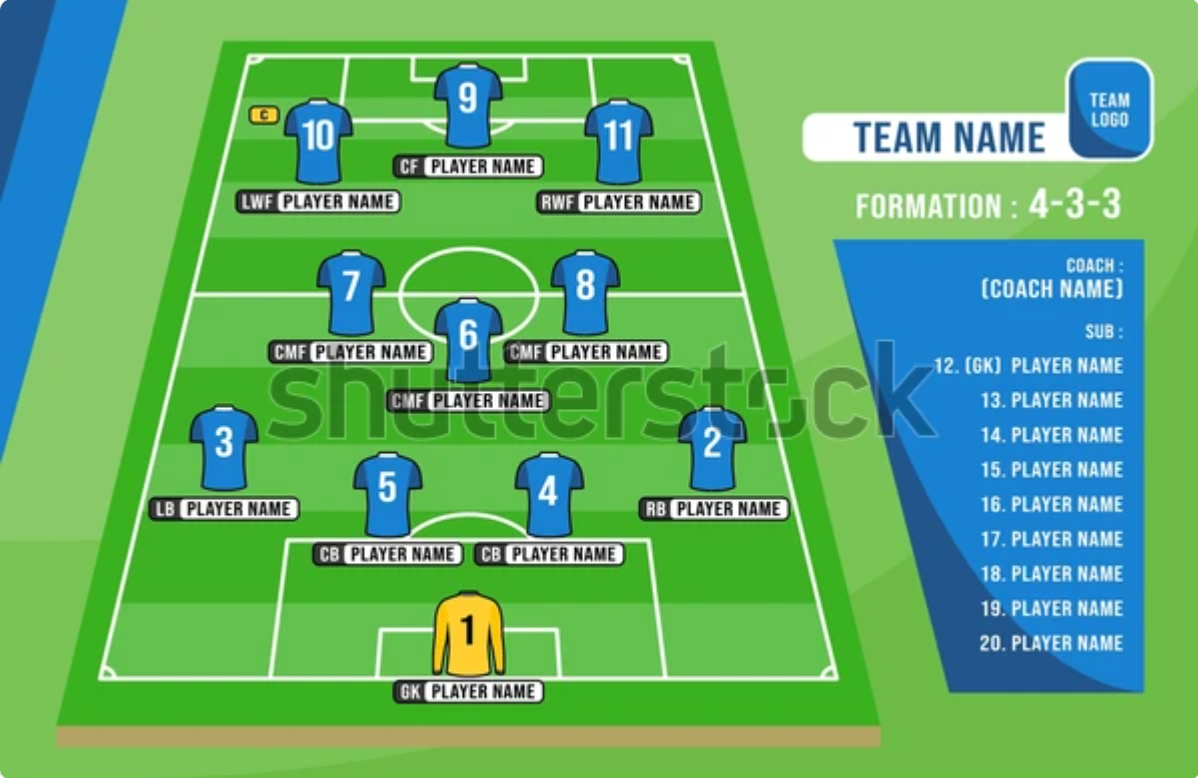


## Basic Checks

In [1333]:
players_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [1334]:
## Stastical summary of the data
players_data.describe()

sofifa_id           age     height_cm     weight_kg       overall  \
count   18278.000000  18278.000000  18278.000000  18278.000000  18278.000000   
mean   219738.864482     25.283291    181.362184     75.276343     66.244994   
std     27960.200461      4.656964      6.756961      7.047744      6.949953   
min       768.000000     16.000000    156.000000     50.000000     48.000000   
25%    204445.500000     22.000000    177.000000     70.000000     62.000000   
50%    226165.000000     25.000000    181.000000     75.000000     66.000000   
75%    240795.750000     29.000000    186.000000     80.000000     71.000000   
max    252905.000000     42.000000    205.000000    110.000000     94.000000   

          potential     value_eur       wage_eur  international_reputation  \
count  18278.000000  1.827800e+04   18278.000000              18278.000000   
mean      71.546887  2.484038e+06    9456.942773                  1.103184   
std        6.139669  5.585481e+06   21351.714095                  0.378861   
min       49.000000  0.000000e+00       0.000000                  1.000000   
25%       67.000000  3.250000e+05    1000.000000                  1.000000   
50%       71.000000  7.000000e+05    3000.000000                  1.000000   
75%       75.000000  2.100000e+06    8000.000000                  1.000000   
max       95.000000  1.055000e+08  565000.000000                  5.000000   

          weak_foot   skill_moves  release_clause_eur  team_jersey_number  \
count  18278.000000  18278.000000        1.698000e+04        18038.000000   
mean       2.944250      2.368038        4.740717e+06           20.103892   
std        0.664656      0.765038        1.103002e+07           16.603639   
min        1.000000      1.000000        1.300000e+04            1.000000   
25%        3.000000      2.000000        5.630000e+05            9.000000   
50%        3.000000      2.000000        1.200000e+06           17.000000   
75%        3.000000      3.000000        3.700000e+06           27.000000   
max        5.000000      5.000000        1.958000e+08           99.000000   

       contract_valid_until  nation_jersey_number          pace      shooting  \
count          18038.000000           1126.000000  16242.000000  16242.000000   
mean            2021.114591             12.114565     67.700899     52.298301   
std                1.289888              6.735922     11.297656     14.029418   
min             2019.000000              1.000000     24.000000     15.000000   
25%             2020.000000              6.000000     61.000000     42.000000   
50%             2021.000000             12.000000     69.000000     54.000000   
75%             2022.000000             18.000000     75.000000     63.000000   
max             2026.000000             30.000000     96.000000     93.000000   

            passing     dribbling     defending        physic    gk_diving  \
count  16242.000000  16242.000000  16242.000000  16242.000000  2036.000000   
mean      57.233777     62.531585     51.553503     64.876678    65.422397   
std       10.407844     10.284950     16.419528      9.760162     7.736278   
min       24.000000     23.000000     15.000000     27.000000    44.000000   
25%       50.000000     57.000000     36.000000     59.000000    60.000000   
50%       58.000000     64.000000     56.000000     66.000000    65.000000   
75%       64.000000     69.000000     65.000000     72.000000    70.000000   
max       92.000000     96.000000     90.000000     90.000000    90.000000   

       gk_handling   gk_kicking  gk_reflexes     gk_speed  gk_positioning  \
count  2036.000000  2036.000000  2036.000000  2036.000000     2036.000000   
mean     63.146365    61.832515    66.390472    37.798625       63.374754   
std       7.244023     7.510709     8.154062    10.634038        8.447876   
min      42.000000    35.000000    45.000000    12.000000       41.000000   
25%      58.000000    57.000000    60.750000    29.000000       58.000000  

In [1335]:
players_data.isnull().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

## EDA

In [1337]:
players_data.head(30)

sofifa_id                                         player_url  \
0      158023  https://sofifa.com/player/158023/lionel-messi/...   
1       20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2      190871  https://sofifa.com/player/190871/neymar-da-sil...   
3      200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4      183277  https://sofifa.com/player/183277/eden-hazard/2...   
5      192985  https://sofifa.com/player/192985/kevin-de-bruy...   
6      192448  https://sofifa.com/player/192448/marc-andre-te...   
7      203376  https://sofifa.com/player/203376/virgil-van-di...   
8      177003  https://sofifa.com/player/177003/luka-modric/2...   
9      209331  https://sofifa.com/player/209331/mohamed-salah...   
10     231747  https://sofifa.com/player/231747/kylian-mbappe...   
11     201024  https://sofifa.com/player/201024/kalidou-kouli...   
12     202126  https://sofifa.com/player/202126/harry-kane/20...   
13     212831  https://sofifa.com/player/212831/alisson-ramse...   
14     193080  https://sofifa.com/player/193080/david-de-gea-...   
15     215914  https://sofifa.com/player/215914/ngolo-kante/2...   
16     138956  https://sofifa.com/player/138956/giorgio-chiel...   
17     153079  https://sofifa.com/player/153079/sergio-aguero...   
18     155862  https://sofifa.com/player/155862/sergio-ramos-...   
19     176580  https://sofifa.com/player/176580/luis-suarez/2...   
20     188545  https://sofifa.com/player/188545/robert-lewand...   
21     189511  https://sofifa.com/player/189511/sergio-busque...   
22     194765  https://sofifa.com/player/194765/antoine-griez...   
23     211110  https://sofifa.com/player/211110/paulo-dybala/...   
24     195864  https://sofifa.com/player/195864/paul-pogba/20...   
25     210257  https://sofifa.com/player/210257/ederson-santa...   
26     202652  https://sofifa.com/player/202652/raheem-sterli...   
27     190460  https://sofifa.com/player/190460/christian-eri...   
28     192119  https://sofifa.com/player/192119/thibaut-court...   
29     152729  https://sofifa.com/player/152729/gerard-pique-...   

           short_name                            long_name  age         dob  \
0            L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1   Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2           Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3            J. Oblak                            Jan Oblak   26  1993-01-07   
4           E. Hazard                          Eden Hazard   28  1991-01-07   
5        K. De Bruyne                      Kevin De Bruyne   28  1991-06-28   
6       M. ter Stegen                Marc-André ter Stegen   27  1992-04-30   
7         V. van Dijk                      Virgil van Dijk   27  1991-07-08   
8           L. Modrić                          Luka Modrić   33  1985-09-09   
9            M. Salah                 Mohamed  Salah Ghaly   27  1992-06-15   
10          K. Mbappé                        Kylian Mbappé   20  1998-12-20   
11       K. Koulibaly                    Kalidou Koulibaly   28  1991-06-20   
12            H. Kane                           Harry Kane   25  1993-07-28   
13            Alisson                Alisson Ramses Becker   26  1992-10-02   
14             De Gea                David De Gea Quintana   28  1990-11-07   
15           N. Kanté                         N'Golo Kanté   28  1991-03-29   
16       G. Chiellini                    Giorgio Chiellini   34  1984-08-14   
17          S. Agüero    Sergio Leonel Agüero del Castillo   31  1988-06-02   
18       Sergio Ramos                  Sergio Ramos García   33  1986-03-30   
19          L. Suárez             Luis Alberto Suárez Díaz   32  1987-01-24   
20     R. Lewandowski                   Robert Lewandowski   30  1988-08-21   
21    Sergio Busquets             Sergio Busquets i Burgos   30  1988-07-16   
22       A. Griezmann                    Antoine Griezmann   28  1991-03-21   

In [1338]:
numeric_columns = players_data[["sofifa_id","age","height_cm","weight_kg","overall","potential","value_eur","wage_eur","release_clause_eur","team_jersey_number","contract_valid_until","pace","shooting","passing","dribbling","defending","physic","attacking_crossing","attacking_finishing","attacking_heading_accuracy","attacking_short_passing","attacking_volleys","skill_dribbling","skill_curve","skill_fk_accuracy","skill_long_passing","skill_ball_control","movement_acceleration","movement_sprint_speed","movement_agility","movement_reactions","movement_balance","power_shot_power","power_jumping","power_stamina","power_strength","power_long_shots","mentality_aggression","mentality_interceptions","mentality_positioning","mentality_vision","mentality_penalties","mentality_composure","defending_marking","defending_standing_tackle","defending_sliding_tackle","goalkeeping_diving","goalkeeping_handling","goalkeeping_kicking","goalkeeping_positioning","goalkeeping_reflexes"]]

In [1339]:
numeric_columns.head(20)

sofifa_id  age  height_cm  weight_kg  overall  potential  value_eur  \
0      158023   32        170         72       94         94   95500000   
1       20801   34        187         83       93         93   58500000   
2      190871   27        175         68       92         92  105500000   
3      200389   26        188         87       91         93   77500000   
4      183277   28        175         74       91         91   90000000   
5      192985   28        181         70       91         91   90000000   
6      192448   27        187         85       90         93   67500000   
7      203376   27        193         92       90         91   78000000   
8      177003   33        172         66       90         90   45000000   
9      209331   27        175         71       90         90   80500000   
10     231747   20        178         73       89         95   93500000   
11     201024   28        187         89       89         91   67500000   
12     202126   25        188         89       89         91   83000000   
13     212831   26        191         91       89         91   58000000   
14     193080   28        192         82       89         90   56000000   
15     215914   28        168         72       89         90   66000000   
16     138956   34        187         85       89         89   24500000   
17     153079   31        173         70       89         89   60000000   
18     155862   33        184         82       89         89   31500000   
19     176580   32        182         86       89         89   53000000   

    wage_eur  release_clause_eur  team_jersey_number  contract_valid_until  \
0     565000         195800000.0                10.0                2021.0   
1     405000          96500000.0                 7.0                2022.0   
2     290000         195200000.0                10.0                2022.0   
3     125000         164700000.0                13.0                2023.0   
4     470000         184500000.0                 7.0                2024.0   
5     370000         166500000.0                17.0                2023.0   
6     250000         143400000.0                 1.0                2022.0   
7     200000         150200000.0                 4.0                2023.0   
8     340000          92300000.0                10.0                2020.0   
9     240000         148900000.0                11.0                2023.0   
10    155000         191700000.0                 7.0                2022.0   
11    150000         119800000.0                26.0                2021.0   
12    220000         159800000.0                10.0                2024.0   
13    155000         111700000.0                 1.0                2024.0   
14    205000         110600000.0                 1.0                2020.0   
15    235000         130400000.0                 7.0                2023.0   
16    215000          40400000.0                 3.0                2020.0   
17    300000         111000000.0                10.0                2021.0   
18    300000          64600000.0                 4.0                2020.0   
19    355000         108700000.0                 9.0                2021.0   

    pace  shooting  passing  dribbling  defending  physic  attacking_crossing  \
0   87.0      92.0     92.0       96.0       39.0    66.0                  88   
1   90.0      93.0     82.0       89.0       35.0    78.0                  84   
2   91.0      85.0     87.0       95.0       32.0    58.0                  87   
3    NaN       NaN      NaN        NaN        NaN     NaN                  13   
4   91.0      83.0     86.0       94.0       35.0    66.0                  81   
5   76.0      86.0     92.0       86.0       61.0    78.0                  93   
6    NaN       NaN      NaN        NaN        NaN     NaN                  18   
7   77.0      60.0     70.0       71.0       90.0    86.0                  53   
8   74.0      76.0     89.0       89.0       72.0    66.0   

In [1340]:
categorical_columns = players_data.drop(columns=["sofifa_id","age","height_cm","weight_kg","overall","potential","value_eur","wage_eur","release_clause_eur","team_jersey_number","contract_valid_until","pace","shooting","passing","dribbling","defending","physic","attacking_crossing","attacking_finishing","attacking_heading_accuracy","attacking_short_passing","attacking_volleys","skill_dribbling","skill_curve","skill_fk_accuracy","skill_long_passing","skill_ball_control","movement_acceleration","movement_sprint_speed","movement_agility","movement_reactions","movement_balance","power_shot_power","power_jumping","power_stamina","power_strength","power_long_shots","mentality_aggression","mentality_interceptions","mentality_positioning","mentality_vision","mentality_penalties","mentality_composure","defending_marking","defending_standing_tackle","defending_sliding_tackle","goalkeeping_diving","goalkeeping_handling","goalkeeping_kicking","goalkeeping_positioning","goalkeeping_reflexes"])
categorical_columns

player_url         short_name  \
0      https://sofifa.com/player/158023/lionel-messi/...           L. Messi   
1      https://sofifa.com/player/20801/c-ronaldo-dos-...  Cristiano Ronaldo   
2      https://sofifa.com/player/190871/neymar-da-sil...          Neymar Jr   
3      https://sofifa.com/player/200389/jan-oblak/20/...           J. Oblak   
4      https://sofifa.com/player/183277/eden-hazard/2...          E. Hazard   
...                                                  ...                ...   
18273  https://sofifa.com/player/245006/shuai-shao/20...         Shao Shuai   
18274  https://sofifa.com/player/250995/mingjie-xiao/...       Xiao Mingjie   
18275  https://sofifa.com/player/252332/wei-zhang/20/...          Zhang Wei   
18276  https://sofifa.com/player/251110/haijian-wang/...       Wang Haijian   
18277  https://sofifa.com/player/233449/ximing-pan/20...         Pan Ximing   

                                 long_name         dob nationality  \
0           Lionel Andrés Messi Cuccittini  1987-06-24   Argentina   
1      Cristiano Ronaldo dos Santos Aveiro  1985-02-05    Portugal   
2            Neymar da Silva Santos Junior  1992-02-05      Brazil   
3                                Jan Oblak  1993-01-07    Slovenia   
4                              Eden Hazard  1991-01-07     Belgium   
...                                    ...         ...         ...   
18273                                   邵帅  1997-03-10    China PR   
18274                         Mingjie Xiao  1997-01-01    China PR   
18275                                   张威  2000-05-16    China PR   
18276                                  汪海健  2000-08-02    China PR   
18277                                  潘喜明  1993-01-11    China PR   

                                club player_positions preferred_foot  \
0                       FC Barcelona       RW, CF, ST           Left   
1                           Juventus           ST, LW          Right   
2                Paris Saint-Germain          LW, CAM          Right   
3                    Atlético Madrid               GK          Right   
4                        Real Madrid           LW, CF          Right   
...                              ...              ...            ...   
18273               Beijing Renhe FC               CB          Right   
18274               Shanghai SIPG FC               CB          Right   
18275         Hebei China Fortune FC               CM          Right   
18276  Shanghai Greenland Shenhua FC               CM          Right   
18277         Hebei China Fortune FC               CM          Right   

       international_reputation  weak_foot  skill_moves      work_rate  \
0                             5          4            4     Medium/Low   
1                             5          4            5       High/Low   
2                             5          5            5    High/Medium   
3                             3          3            1  Medium/Medium   
4                             4          4            4    High/Medium   
...                         ...        ...          ...            ...   
18273                         1          3            2    Medium/High   
18274                         1          2            2  Medium/Medium   
18275                         1          2            2     Low/Medium   
18276                         1          2            2        Low/Low   
18277                         1          3            2  Medium/Medium   

        body_type real_face  \
0           Messi       Yes   
1      C. Ronaldo       Yes   
2          Neymar       Yes   
3          Normal       Yes   
4          Normal       Yes   
...           ...       ...   
18273      Normal        No   
18274      Normal        No   
18275        Lean        No   
18276        Lean        No   
18277      Normal        No   

                                             player_tags team_position  \
0      #Dribbler, #Distance Shooter, #Crosser, #FK Sp..

### Univariate Analysis

#### Height, Weight and Age Distribution

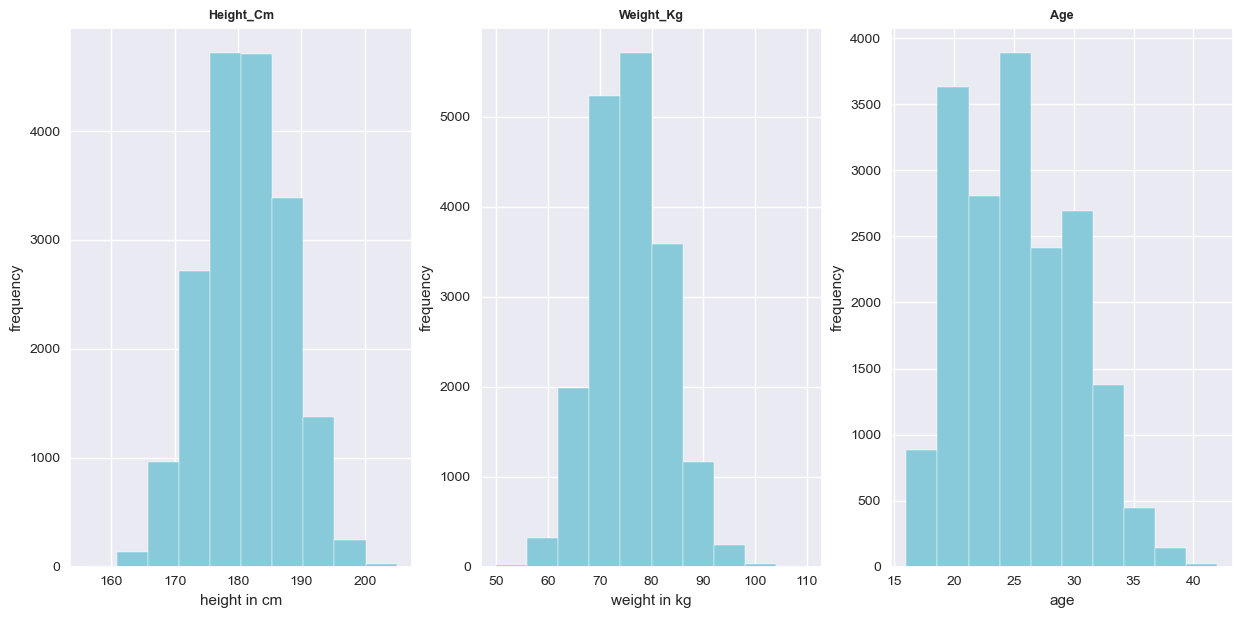

In [1343]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.hist(x = numeric_columns["height_cm"],color='c')
plt.xlabel("height in cm")
plt.ylabel("frequency")
plt.title("height_cm".title(),fontsize=9,fontweight="bold")

plt.subplot(1,3,2)
plt.hist(numeric_columns["weight_kg"],color='c')
plt.xlabel("weight in kg")
plt.ylabel("frequency")
plt.title("weight_kg".title(),fontsize=9,fontweight="bold")

plt.subplot(1,3,3)
plt.hist(numeric_columns["age"],color='c')
plt.xlabel("age")
plt.ylabel("frequency")
plt.title("age".title(),fontsize=9,fontweight="bold")
plt.show()

- All 3 attributes appear to follow normal distribution
- Heights of most of the players gathered around 175 cm to 185 cm. Highest peak is seen at 180 cm.
- Most players in the fifa dataset weighed around 70 kg to 85kg. Most number of players has weight of 75 kg.
- Age distribution appeared to be slightly right skewed. Players' age is spread a bit more on the right side than the left one. Most number of players fell into age between 18 to 30 years.

#### Top 10 countries based on the players

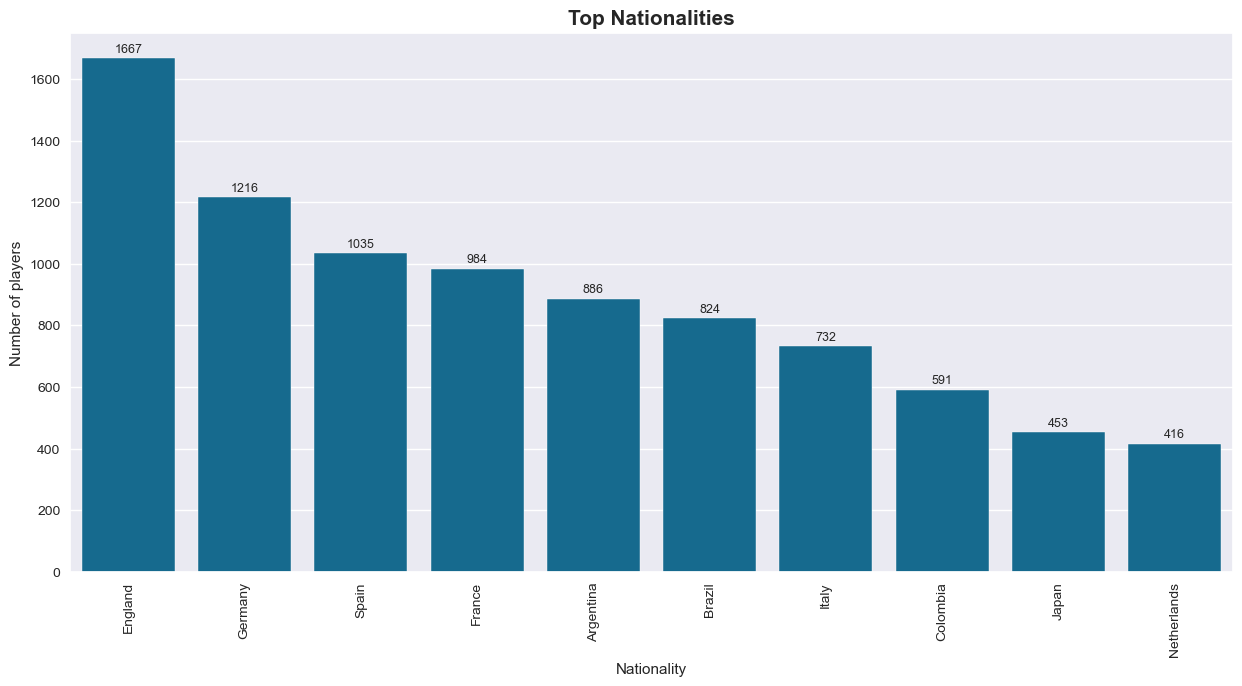

In [1346]:
## Fetching the top 10 countries based on the no of players
top_nationalalities = players_data.nationality.value_counts(ascending=False)[:10]

plt.figure(figsize=(15,7))
sns.barplot(x=top_nationalalities.keys(),y=top_nationalalities)

## Adding count on top of each bar
for i,count in enumerate(top_nationalalities.values):
    plt.text(i,count+10,str(count),ha="center",va="bottom",fontsize=9)

plt.xlabel("Nationality")
plt.ylabel("Number of players")
plt.xticks(rotation=90)
plt.title('Top nationalities'.title(), fontsize=15, fontweight="bold")
plt.show()

**Insights for the top 10 countries based on the no of players**
- England is contributing the 9.12% of the players to fifa from overall dataset
- Among the top 10 countries, six are from Europe continent, highlighting the significant contribution of European players to the game
- Among the top 10 countries, two are from South America continent, highlighting the significant contribution of European players to the game
- Among the top 10 countries, only one is from Asia continent, highlighting the significant contribution of European players to the game
- Top 10 countries are contributing the 48% of the players to the game

#### Value, Wage and Release Clause of Players

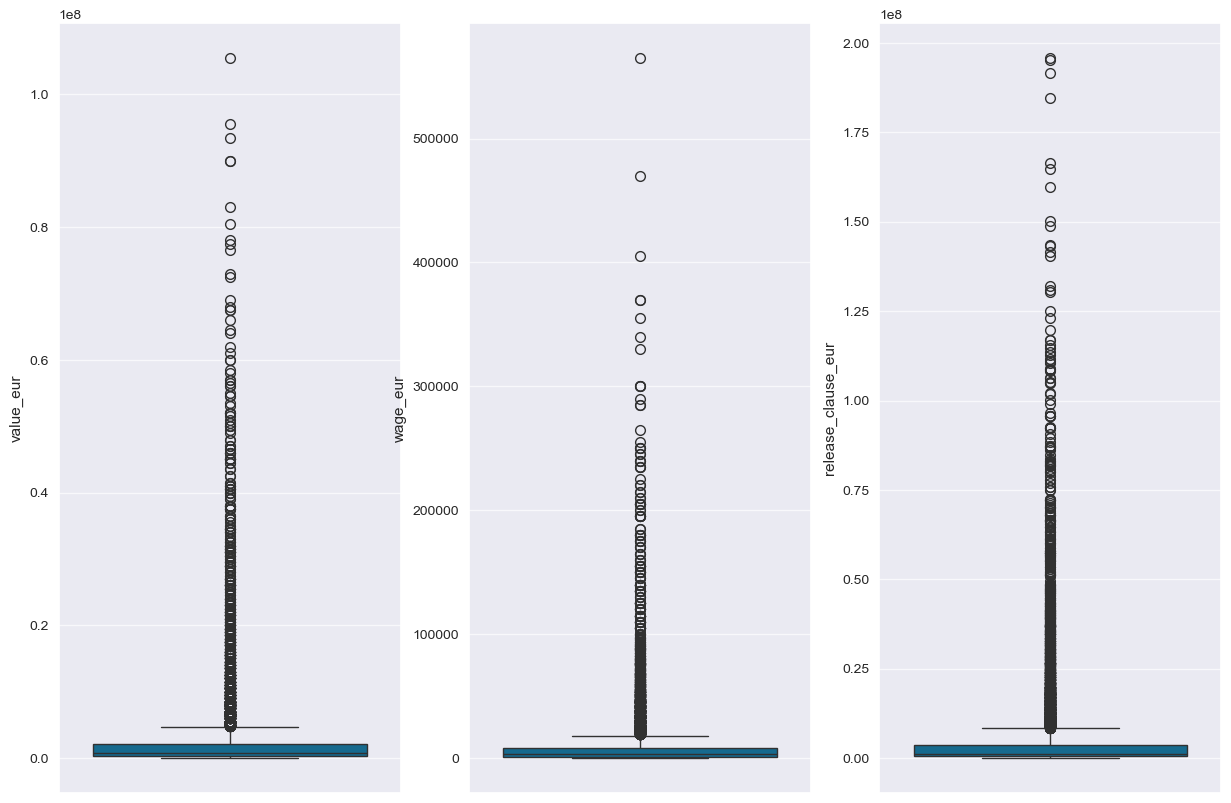

In [1349]:
plt.figure(figsize=(15,10))

plt.subplot(1,3,1)
sns.boxplot(y="value_eur",data=numeric_columns)
plt.grid(axis='y', linestyle='-', alpha=0.7)

plt.subplot(1,3,2)
sns.boxplot(y="wage_eur",data=numeric_columns)
plt.grid(axis='y', linestyle='-', alpha=0.7)

plt.subplot(1,3,3)
sns.boxplot(y="release_clause_eur",data=numeric_columns)
plt.grid(axis='y', linestyle='-', alpha=0.7)

- There are players who have zero market value, wage, and/or release clause. It appears as values are unavailable or an error in data entry because it does not make much sense that many players will play for free with zero market value
- The distributions of all three attributes are positively skewed, with a long tail towards the higher values.
- The maximum values for all three attributes are significantly higher than their respective third quartiles, indicating the presence of outliers with extremely high values.
- The median wage is much lower than the median market value and median release clause, indicating that players receive a relatively small portion of their market value as wage.

#### Players preferred Foot

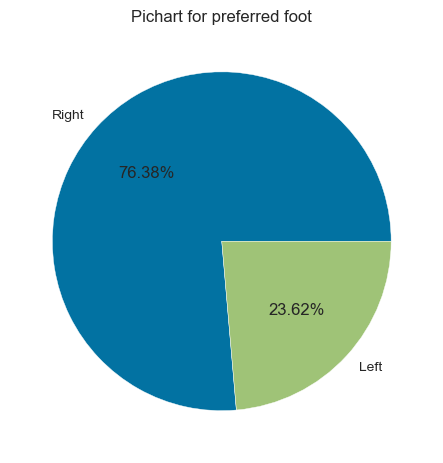

In [1352]:
foot = players_data.preferred_foot.value_counts()
plt.pie(foot,labels=foot.keys(),autopct="%.2f%%")
plt.title("Pichart for preferred foot")
plt.show()

- Most of the players 76.38%(13960) players preferred foot is right
- Only 23.62%(4317) of the players preferred foot is left

#### Overall and Potential Attributes

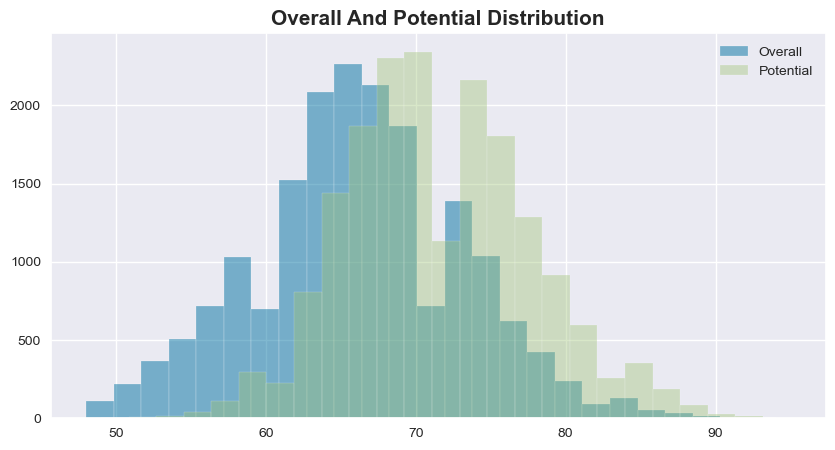

In [1355]:
plt.figure(figsize=(10,5))
plt.hist(players_data['overall'], bins=25, alpha=0.5, label='Overall')
plt.hist(players_data['potential'], bins=25, alpha=0.4, label='Potential')
plt.legend()
plt.title('Overall and Potential Distribution'.title(), fontsize=15, fontweight="bold");

- Both Overall and Potential ratings predominantly range between 50 and 80.
- A very small percentage of players exceed 80, indicating that players rated above this threshold are elite.
- The Potential distribution skews slightly to the right compared to the Overall distribution, suggesting that many players have room for growth in their ratings.
- The peak for Overall Ratings is around 65–70,the peak for Potential Ratings is higher, around 70–75, showing that most players are predicted to improve their skills over time.
- The wider spread of Potential Ratings compared to Overall Ratings suggests that there is a significant variance in players' predicted growth trajectories.
- This could reflect the impact of training, performance, and career development.
- Most players in the game are average-rated, with only a few standing out as exceptional talents.

### Bivariate Analysis

#### Weight and Height Correlation

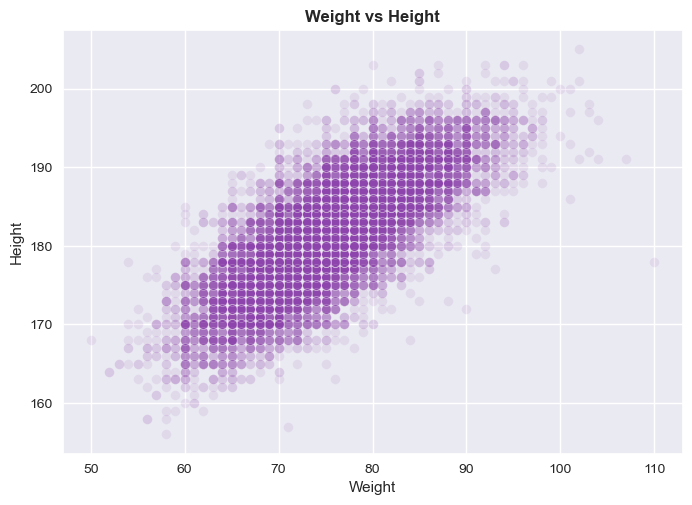

In [1359]:
sns.scatterplot(x=players_data.weight_kg,y=players_data.height_cm,alpha=0.1,color="#8e44ad")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Weight vs Height",fontweight="bold")
plt.show()

- From above scatterplot it is observed that weight and height are in linear nature means height of players wrt weight of players

#### Age and Performance Correlation

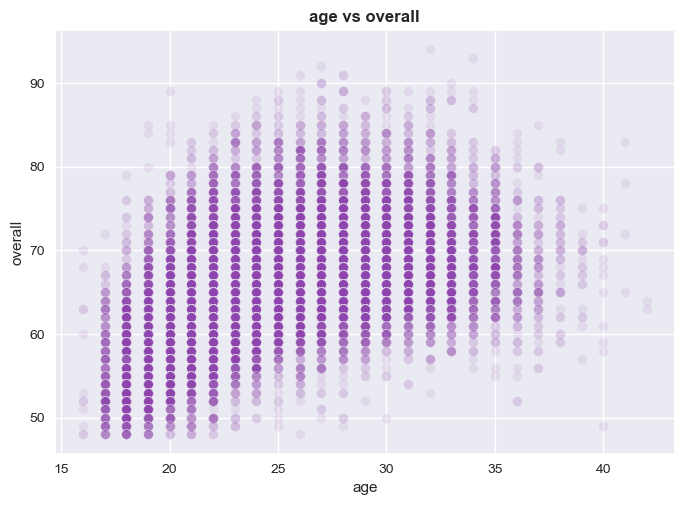

In [1362]:
sns.scatterplot(x=players_data.age,y=players_data.overall,alpha=0.1,color="#8e44ad")
plt.xlabel("age")
plt.ylabel("overall")
plt.title("age vs overall",fontweight="bold")
plt.show()

- Above scatterplot is indicating that the age and performance are non linear in nature o, but from 20-27 years age players performance is increasing wrt age 

#### Height vs Overall Correlation

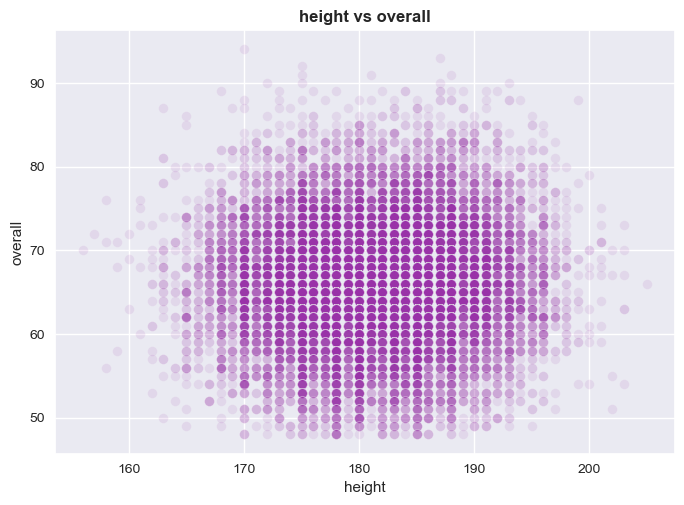

In [1365]:
sns.scatterplot(x=players_data.height_cm,y=players_data.overall,alpha=0.1,color="#9932a8")
plt.xlabel("height")
plt.ylabel("overall")
plt.title("height vs overall",fontweight="bold")
plt.show()

- The height and overall performance is not correlated means the overall performance is neither decreasing nor increasing wrt height of players but most of the players height is inbetween 170cm - 195cm

#### Weight vs Overall Correlation

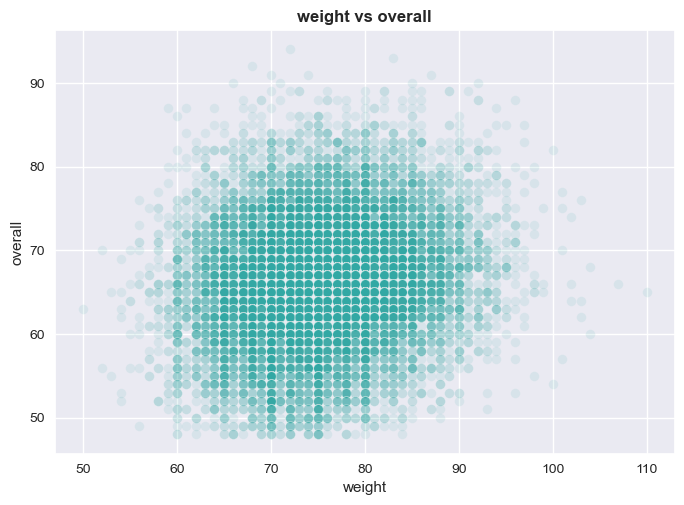

In [1368]:
sns.scatterplot(x=players_data.weight_kg,y=players_data.overall,alpha=0.1,color="#32a8a4")
plt.xlabel("weight")
plt.ylabel("overall")
plt.title("weight vs overall",fontweight="bold")
plt.show()

#### Overall vs Value_eur

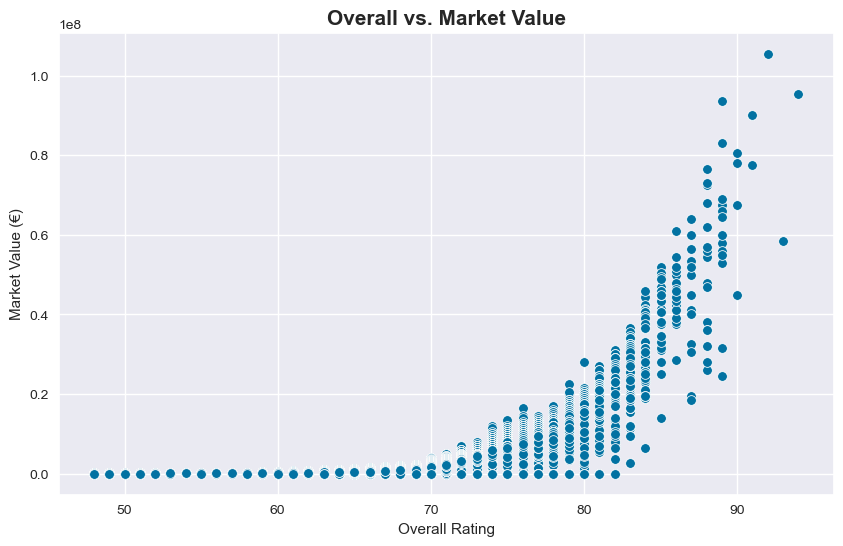

In [1370]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=players_data['overall'], y=players_data['value_eur'])
plt.title('Overall vs. Market Value', fontsize=15, fontweight='bold')
plt.xlabel('Overall Rating')
plt.ylabel('Market Value (€)')
plt.show()

#### Release clause vs Value and Wage

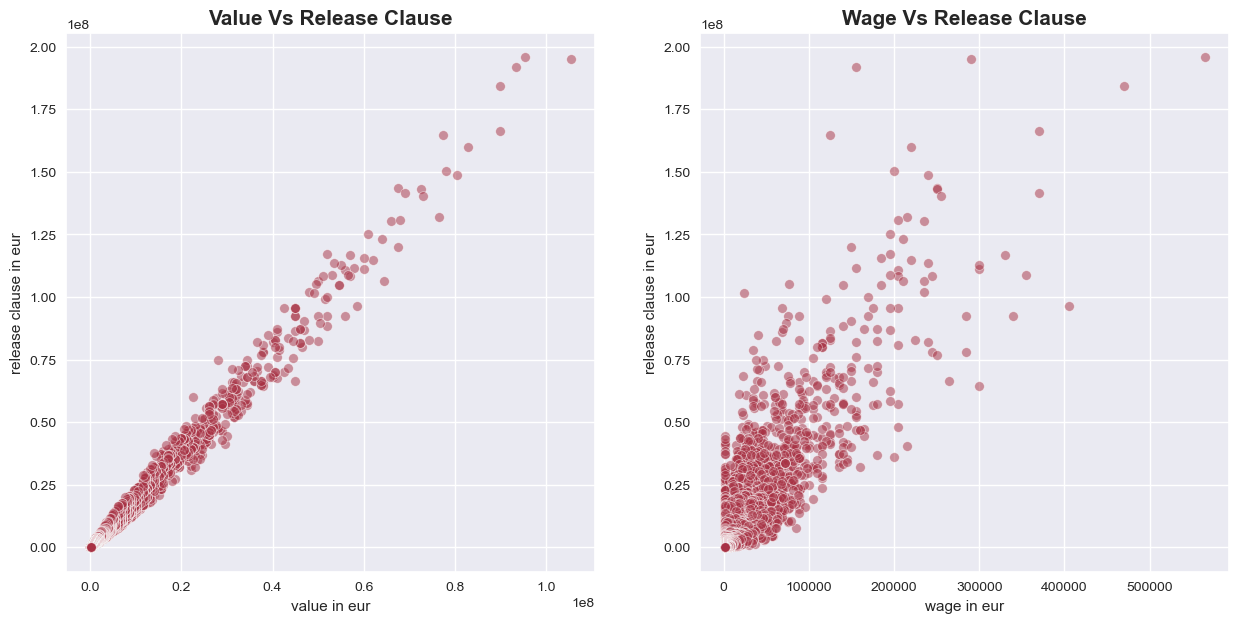

In [1372]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.scatterplot(x=players_data.value_eur, y=players_data.release_clause_eur, alpha=0.5,color="#a83244")
plt.xlabel('value in eur')
plt.ylabel('release clause in eur')
plt.title('value vs release clause'.title(), fontsize=15, fontweight="bold")

plt.subplot(1,2,2)
sns.scatterplot(x=players_data.wage_eur,y=players_data.release_clause_eur, alpha=0.5,color="#a83244")
plt.xlabel('wage in eur')
plt.ylabel('release clause in eur')
plt.title('wage vs release clause'.title(), fontsize=15, fontweight="bold");

In [1373]:
players_data.age.value_counts()

age
22    1446
21    1375
23    1358
27    1324
25    1319
24    1296
26    1270
20    1247
28    1086
19    1011
29     999
30     883
31     807
18     640
32     597
33     475
35     310
34     301
17     229
36     131
37      81
38      42
39      20
40      13
16      12
41       4
42       2
Name: count, dtype: int64

#### Eldest Players

In [1375]:
Eldest_player=players_data[players_data["age"]==players_data.age.max()]
Eldest_player

sofifa_id                                         player_url  \
11832     142998  https://sofifa.com/player/142998/cristian-muno...   
13003     208927  https://sofifa.com/player/208927/hussain-omar-...   

         short_name                           long_name  age         dob  \
11832      C. Muñoz     Cristian Fernando Muñoz Hoffman   42  1977-07-01   
13003  H. Sulaimani  Hussein Omar Abdul Ghani Sulaimani   42  1977-01-21   

       height_cm  weight_kg   nationality                          club  \
11832        177         73     Argentina  CD Universidad de Concepción   
13003        173         70  Saudi Arabia                       Al Ahli   

       overall  potential  value_eur  wage_eur player_positions  \
11832       64         64      50000      1000               GK   
13003       63         63          0      5000               LB   

      preferred_foot  international_reputation  weak_foot  skill_moves  \
11832          Right                         1          3            1   
13003           Left                         1          3            3   

           work_rate body_type real_face  release_clause_eur player_tags  \
11832  Medium/Medium    Normal        No             68000.0         NaN   
13003    High/Medium      Lean        No                 NaN         NaN   

      team_position  team_jersey_number loaned_from      joined  \
11832            GK                 1.0         NaN  2013-01-01   
13003            LB                24.0         NaN  2019-01-14   

       contract_valid_until nation_position  nation_jersey_number  pace  \
11832                2019.0             NaN                   NaN   NaN   
13003                2023.0             NaN                   NaN  47.0   

       shooting  passing  dribbling  defending  physic  gk_diving  \
11832       NaN      NaN        NaN        NaN     NaN       64.0   
13003      53.0     68.0       64.0       64.0    72.0        NaN   

       gk_handling  gk_kicking  gk_reflexes  gk_speed  gk_positioning  \
11832         63.0        66.0         61.0      55.0            64.0   
13003          NaN         NaN          NaN       NaN             NaN   

                                           player_traits  attacking_crossing  \
11832              Avoids Using Weaker Foot, Second Wind                  25   
13003  Inflexible, Dives Into Tackles (CPU AI Only), ...                  70   

       attacking_finishing  attacking_heading_accuracy  \
11832                   15                          13   
13003                   43                          61   

       attacking_short_passing  attacking_volleys  skill_dribbling  \
11832                       36                 12               22   
13003                       67                 43               63   

       skill_curve  skill_fk_accuracy  skill_long_passing  skill_ball_control  \
11832           19                 20                  34                  31   
13003           69                 69                  68                  64   

       movement_acceleration  movement_sprint_speed  movement_agility  \
11832                     53                     56                33   
13003                     46                     47                64   

       movement_reactions  movement_balance  power_shot_power  power_jumping  \
11832                  62                58                50             73   
13003                  64                68                65             69   

       power_stamina  power_strength  power_long_shots  mentality_aggression  \
11832             29              65                20                    35   
13003             58              72                63                    92   

       mentality_interceptions  mentality_positioning  mentality_vision  \
11832                       25                     16                45   
13003                       65                     64                68   

       mentality_penalties  m

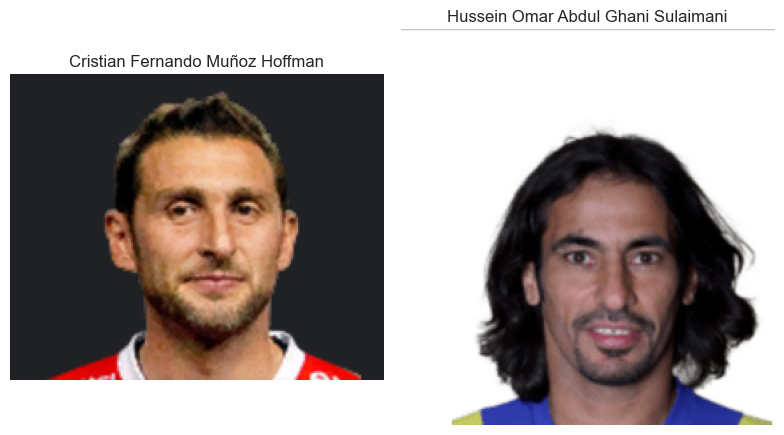

In [1376]:
image1 = Image.open(r'C:\Users\Prathibha\Documents\Nikhil Practise ML+DL+NLP\Cristian Fernando Muñoz Hoffman.png')
image2 = Image.open(r'C:\Users\Prathibha\Documents\Nikhil Practise ML+DL+NLP\Hussein Omar Abdul Ghani Sulaimani.png')

fig, axes = plt.subplots(1, 2, figsize=(8, 5))

# Display the images
axes[0].imshow(image1)
axes[0].axis('off')  
axes[0].set_title('Cristian Fernando Muñoz Hoffman')

axes[1].imshow(image2)
axes[1].axis('off') 
axes[1].set_title('Hussein Omar Abdul Ghani Sulaimani')

plt.tight_layout()
plt.show()

- There are 2 players who are playing at the age of 42 years

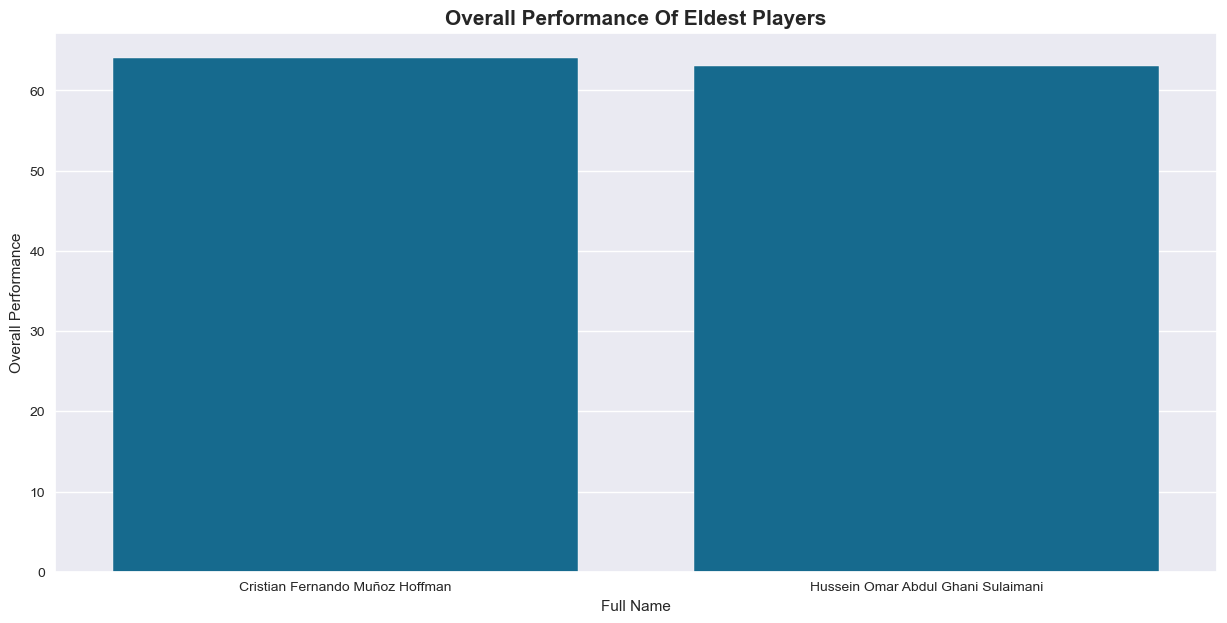

In [1378]:
plt.figure(figsize=(15,7))
sns.barplot(x=Most_aged_player["long_name"],y=Most_aged_player["overall"])
plt.xlabel("Full Name")
plt.ylabel("Overall Performance")
plt.title('Overall Performance of Eldest Players'.title(), fontsize=15, fontweight="bold")
plt.show()

- Both players seem to have high and nearly identical overall performance scores (around 65%).

#### Young Players

In [1381]:
Young_players=players_data[players_data["age"]==players_data.age.min()]
Young_players

sofifa_id                                         player_url  \
4764      246618  https://sofifa.com/player/246618/adam-hlozek/2...   
6630      252037  https://sofifa.com/player/252037/fabio-daniel-...   
12158     252259  https://sofifa.com/player/252259/enzo-millot/2...   
12160     247888  https://sofifa.com/player/247888/sebastiano-es...   
14626     252238  https://sofifa.com/player/252238/alan-velasco/...   
17614     248187  https://sofifa.com/player/248187/daniel-obbekj...   
17782     248567  https://sofifa.com/player/248567/sebastian-and...   
17827     251219  https://sofifa.com/player/251219/darragh-burns...   
18031     246815  https://sofifa.com/player/246815/oliver-stefan...   
18171     252892  https://sofifa.com/player/252892/joseph-starbu...   
18242     246410  https://sofifa.com/player/246410/robin-wikberg...   
18243     247100  https://sofifa.com/player/247100/elliott-sarto...   

          short_name                  long_name  age         dob  height_cm  \
4764       A. Hložek                Adam Hložek   16  2002-07-25        185   
6630     Fábio Silva  Fábio Daniel Soares Silva   16  2002-07-19        185   
12158      E. Millot                Enzo Millot   16  2002-07-17        175   
12160    S. Esposito        Sebastiano Esposito   16  2002-07-02        186   
14626     A. Velasco               Alan Velasco   16  2002-07-27        167   
17614    D. Obbekjær            Daniel Obbekjær   16  2002-07-16        193   
17782    S. Anderson         Sebastian Anderson   16  2002-08-08        175   
17827       D. Burns              Darragh Burns   16  2002-08-06        176   
18031  O. Stefánsson          Oliver Stefánsson   16  2002-08-03        190   
18171    J. Starbuck            Joseph Starbuck   16  2002-08-03        174   
18242     R. Wikberg              Robin Wikberg   16  2002-07-03        186   
18243   E. Sartorius          Elliott Sartorius   16  2002-07-29        174   

       weight_kg       nationality                    club  overall  \
4764          80    Czech Republic            Sparta Praha       70   
6630          75          Portugal                FC Porto       68   
12158         65            France               AS Monaco       63   
12160         75             Italy                   Inter       63   
14626         63         Argentina           Independiente       60   
17614         86           Denmark         Odense Boldklub       53   
17782         64     United States         Colorado Rapids       52   
17827         62  Northern Ireland  St. Patrick's Athletic       52   
18031         75           Iceland          IFK Norrköping       51   
18171         69           England            Grimsby Town       49   
18242         72            Sweden           Östersunds FK       48   
18243         69           England            Lincoln City       48   

       potential  value_eur  wage_eur player_positions preferred_foot  \
4764          86    3500000      1000       RW, ST, RM          Right   
6630          85    1800000      1000               ST          Right   
12158         86     800000      1000               CM           Left   
12160         85     825000      2000               ST          Right   
14626         83     450000      1000       LM, RM, ST          Right   
17614         71     110000      1000               CB          Right   
17782         75     100000      1000               RB          Right   
17827         69     100000      1000           RM, LM          Right   
18031         64      60000      1000               CB           Left   
18171         72      60000      1000               CM          Right   
18242         67      50000      1000          CB, CDM          Right   
18243         67      60000      1000               ST          Right   

       international_reputation  weak_foot  skill_moves      work_rate  \
4764                          1          3            3    High/Medium   
6630                          1  

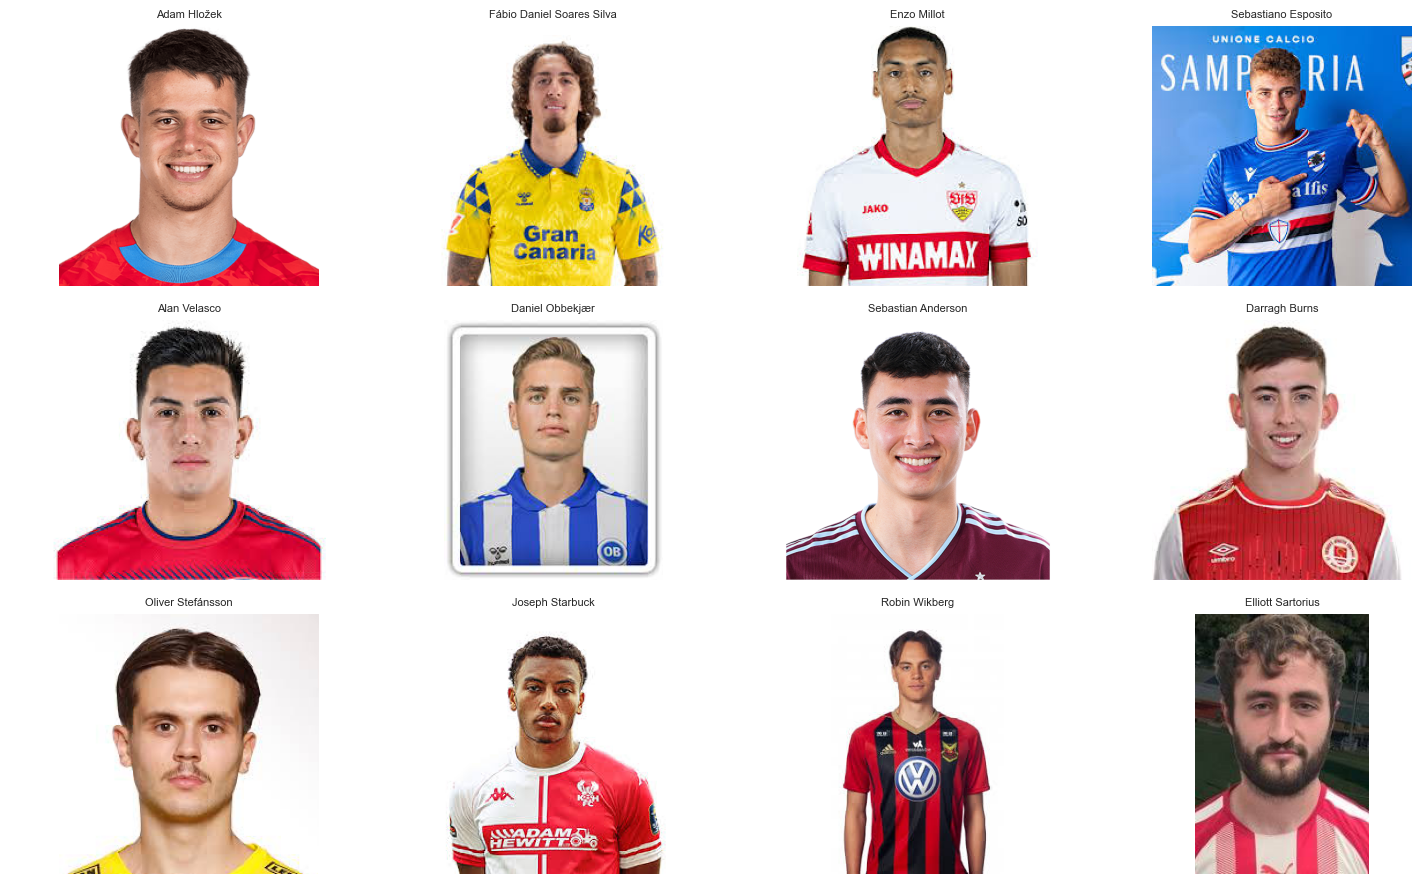

In [1382]:
image1 = Image.open(r'C:\Users\Prathibha\Documents\Nikhil Practise ML+DL+NLP\Adam Hložek.webp')
image2 = Image.open(r'C:\Users\Prathibha\Documents\Nikhil Practise ML+DL+NLP\Fábio Daniel Soares Silva.jpg')
image3 = Image.open(r'C:\Users\Prathibha\Documents\Nikhil Practise ML+DL+NLP\Enzo Millot.jpg')
image4 = Image.open(r'C:\Users\Prathibha\Documents\Nikhil Practise ML+DL+NLP\Sebastiano Esposito.jpg')
image5 = Image.open(r'C:\Users\Prathibha\Documents\Nikhil Practise ML+DL+NLP\Alan Velasco.jpg')
image6 = Image.open(r'C:\Users\Prathibha\Documents\Nikhil Practise ML+DL+NLP\Daniel Obbekjær.jpg')
image7 = Image.open(r'C:\Users\Prathibha\Documents\Nikhil Practise ML+DL+NLP\Sebastian Anderson.png')
image8 = Image.open(r'C:\Users\Prathibha\Documents\Nikhil Practise ML+DL+NLP\Darragh Burns.jpg')
image9 = Image.open(r'C:\Users\Prathibha\Documents\Nikhil Practise ML+DL+NLP\Oliver Stefánsson.jpg')
image10 = Image.open(r'C:\Users\Prathibha\Documents\Nikhil Practise ML+DL+NLP\Joseph Starbuck.jpg')
image11 = Image.open(r'C:\Users\Prathibha\Documents\Nikhil Practise ML+DL+NLP\Robin Wikberg.jpg')
image12 = Image.open(r'C:\Users\Prathibha\Documents\Nikhil Practise ML+DL+NLP\Elliott Sartorius.jpg')

# List of images and their labels
images = [
    (image1, "Adam Hložek"),
    (image2, "Fábio Daniel Soares Silva"),
    (image3, "Enzo Millot"),
    (image4, "Sebastiano Esposito"),
    (image5, "Alan Velasco"),
    (image6, "Daniel Obbekjær"),
    (image7, "Sebastian Anderson"),
    (image8, "Darragh Burns"),
    (image9, "Oliver Stefánsson"),
    (image10, "Joseph Starbuck"),
    (image11, "Robin Wikberg"),
    (image12, "Elliott Sartorius")
]

# Set up the grid for side-by-side images
cols = 4  # Number of columns
rows = len(images) // cols + (len(images) % cols > 0)  # Calculate required rows
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))

# Flatten axes array for easy indexing
axes = axes.flatten()

# Display each image in the grid
for i, (img, label) in enumerate(images):
    axes[i].imshow(img)
    axes[i].axis('off')  # Hide axes
    axes[i].set_title(label, fontsize=8)

# Hide any unused axes
for j in range(len(images), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

- There are 12 players who are playing at the age of 16 years

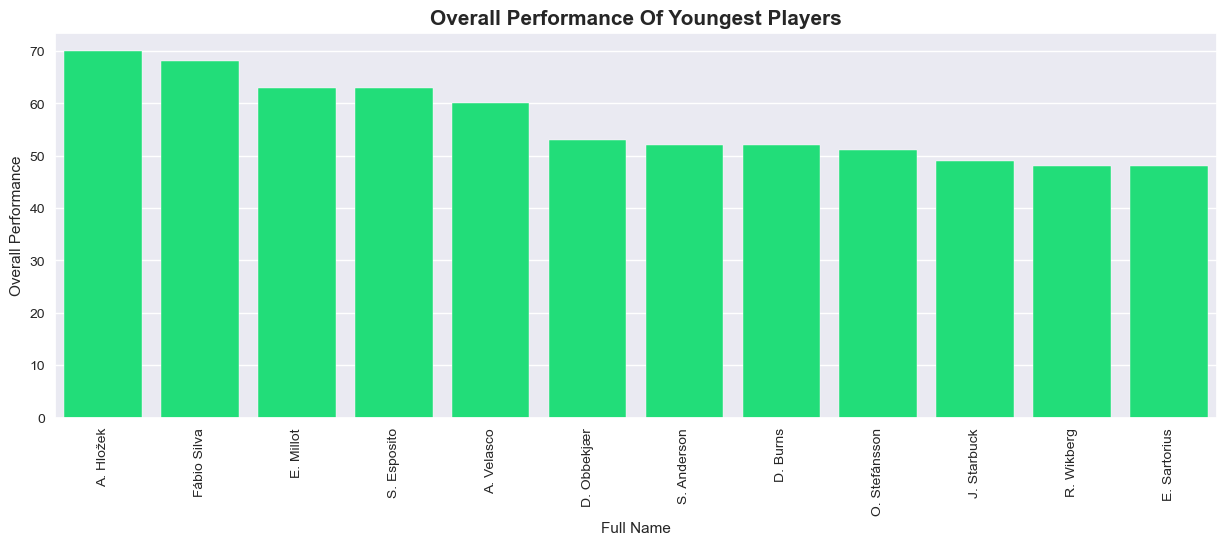

In [1384]:
plt.figure(figsize=(15,5))
sns.barplot(x=Young_players["short_name"],y=Young_players["overall"],color="#03fc77")
plt.xlabel("Full Name")
plt.ylabel("Overall Performance")
plt.title('Overall Performance of Youngest Players'.title(), fontsize=15, fontweight="bold")
plt.xticks(rotation=90)
plt.show()

- Adam Hložek has the highest performance score, followed closely by others like Daniel Soares Silva and Enzo Millot.
- The differences in performance scores among players appear relatively small, indicating a competitive group.

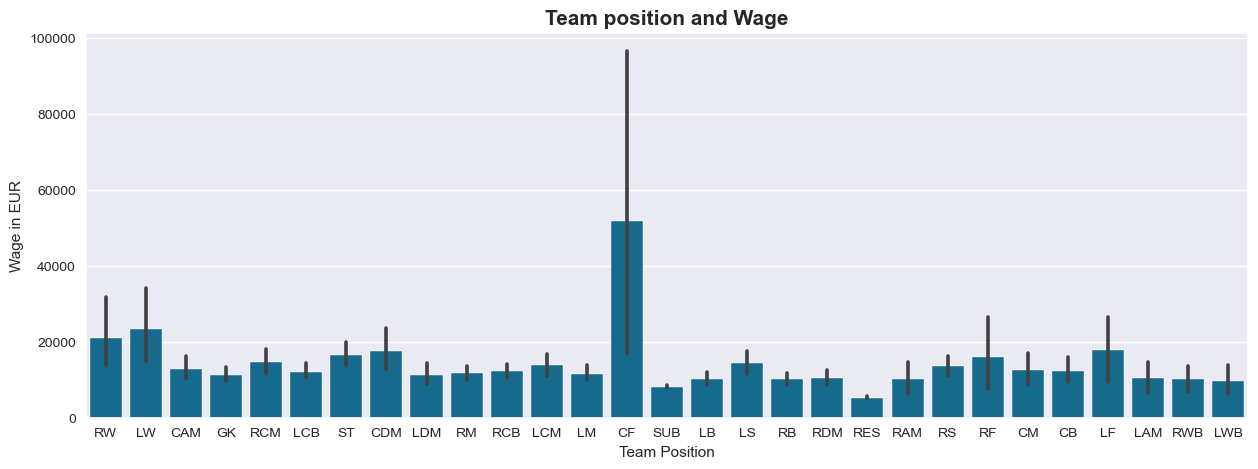

In [1386]:
plt.figure(figsize=(15,5))
sns.barplot(x=players_data.team_position,y=players_data.wage_eur)
plt.xlabel('Team Position')
plt.ylabel('Wage in EUR')
plt.title('Team position and Wage', fontsize=15, fontweight='bold');

- The "CF" (Center Forward) position exhibits the highest average wage, along with a significant range of wages, as represented by the error bars. This suggests that players in this position can command premium wages, with a few top players potentially skewing the average.
- Other attacking roles like "RW" (Right Wing), "LW" (Left Wing), "CAM" (Center Attacking Midfield), and "ST" (Striker) also show relatively higher wages compared to most other positions.
- Wages for defensive roles like "CB" (Center Back), "RB" (Right Back), "LB" (Left Back), and "GK" (Goalkeeper) tend to be lower, with less variation compared to attacking and midfield roles.
- Positions like "SUB" (Substitutes) and "RES" (Reserves) have the lowest wages on average, indicating that non-starting players typically earn less.
- Midfielders generally have consistent wages, with some variation in defensive and central midfield positions like "CDM" (Center Defensive Midfield).
- The error bars highlight the variability within each position. Positions with longer bars, like "CF" and "LW," suggest higher wage disparity, likely influenced by star players.


#### Comparing Top Players

In [1389]:
player_attributes=players_data[['short_name', 'age', 'height_cm', 'weight_kg', 'nationality', 'club',
       'overall', 'potential', 'value_eur', 'wage_eur', 'team_position', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed','gk_positioning',
       'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing','attacking_volleys', 
       'skill_dribbling', 'skill_curve','skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility','movement_reactions', 'movement_balance',
       'power_shot_power','power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions','mentality_positioning', 'mentality_vision', 'mentality_penalties','mentality_composure', 
       'defending_marking', 'defending_standing_tackle','defending_sliding_tackle', 
       ]]

In [1390]:
attributes = ['gk', 'attacking', 'skill', 'movement', 'power', 'mentality', 'defending']

for attr in attributes:
    # Select columns matching the attribute
    cols = [col for col in player_attributes.columns if attr in col]
    
    # Calculate the mean of the selected columns
    player_attributes[attr] = player_attributes[cols].mean(axis=1)
    
    # Replace NaN values with 0 (or another desired value) before converting to integer
    player_attributes[attr] = player_attributes[attr].fillna(0).astype('int')

In [1391]:
def compare_players(player1, player2, attributes=None):
    
    attributes = attributes or ['gk', 'attacking', 'skill', 'movement', 'power', 'mentality', 'defending']
    
    data = [
        go.Scatterpolar(
            r=player_attributes.loc[player_attributes['short_name'] == player, attributes].values[0],
            theta=attributes,
            fill='toself',
            name=player,
            line=dict(color=f"rgba({255*(i==0)},{255*(i==1)},100,1)")
        )
        for i, player in enumerate([player1, player2])
    ]
    
    fig = go.Figure(
        data=data,
        layout=go.Layout(
            polar=dict(radialaxis=dict(visible=True, range=[0, 100])),
            showlegend=True,
            legend=dict(x=0.1, y=1.1)
        )
    )
    fig.show()

#### Messi vs Ronaldo:

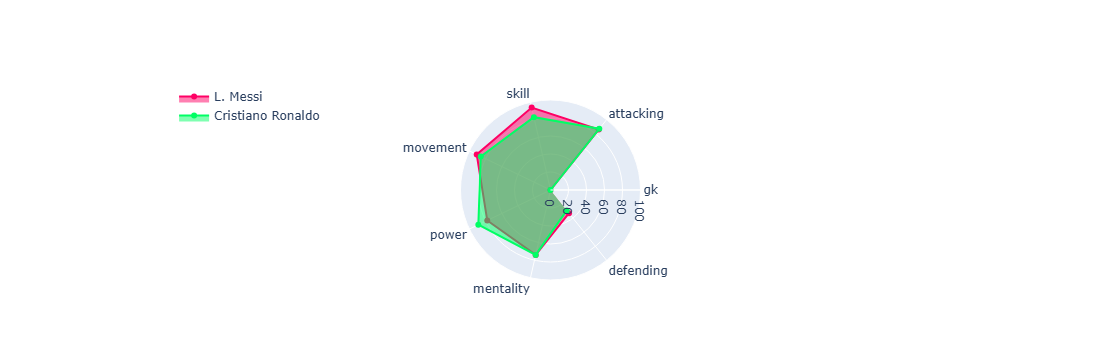

In [1393]:
compare_players('L. Messi','Cristiano Ronaldo')

#### Mbappe vs Haaland:

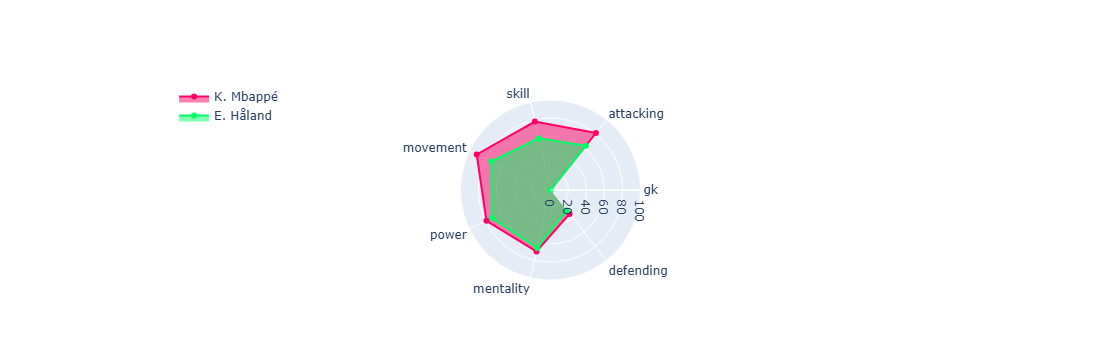

In [1395]:
compare_players('K. Mbappé', 'E. Håland')

## Data Preprocessing

In [1441]:
players_data.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 104 columns):
 #    Column                      Dtype  
---   ------                      -----  
 0    sofifa_id                   int64  
 1    player_url                  object 
 2    short_name                  object 
 3    long_name                   object 
 4    age                         int64  
 5    dob                         object 
 6    height_cm                   int64  
 7    weight_kg                   int64  
 8    nationality                 object 
 9    club                        object 
 10   overall                     int64  
 11   potential                   int64  
 12   value_eur                   int64  
 13   wage_eur                    int64  
 14   player_positions            object 
 15   preferred_foot              object 
 16   international_reputation    int64  
 17   weak_foot                   int64  
 18   skill_moves                 int64  
 19   wo

In [1495]:
##Dropping the irrelevant columns
players_data = players_data.drop(columns=["sofifa_id", "player_url", "long_name", "dob", "nationality", "club", "real_face", "body_type", "player_tags","loaned_from", "joined","team_jersey_number", "nation_jersey_number", "contract_valid_until", "player_traits"])

In [1497]:
players_data.head()

short_name  age  height_cm  weight_kg  overall  potential  \
0           L. Messi   32        170         72       94         94   
1  Cristiano Ronaldo   34        187         83       93         93   
2          Neymar Jr   27        175         68       92         92   
3           J. Oblak   26        188         87       91         93   
4          E. Hazard   28        175         74       91         91   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   
4   90000000    470000           LW, CF          Right   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   
4                         4          4            4    High/Medium   

   release_clause_eur team_position nation_position  pace  shooting  passing  \
0         195800000.0            RW             NaN  87.0      92.0     92.0   
1          96500000.0            LW              LS  90.0      93.0     82.0   
2         195200000.0           CAM              LW  91.0      85.0     87.0   
3         164700000.0            GK              GK   NaN       NaN      NaN   
4         184500000.0            LW              LF  91.0      83.0     86.0   

   dribbling  defending  physic  gk_diving  gk_handling  gk_kicking  \
0       96.0       39.0    66.0        NaN          NaN         NaN   
1       89.0       35.0    78.0        NaN          NaN         NaN   
2       95.0       32.0    58.0        NaN          NaN         NaN   
3        NaN        NaN     NaN       87.0         92.0        78.0   
4       94.0       35.0    66.0        NaN          NaN         NaN   

   gk_reflexes  gk_speed  gk_positioning  attacking_crossing  \
0          NaN       NaN             NaN                  88   
1          NaN       NaN             NaN                  84   
2          NaN       NaN             NaN                  87   
3         89.0      52.0            90.0                  13   
4          NaN       NaN             NaN                  81   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       92   
1                   94                          89                       83   
2                   87                          62                       87   
3                   11                          15                       43   
4                   84                          61                       89   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               97           93                 94   
1                 87               89           81                 76   
2                 87               96           88                 87   
3                 13               12           13                 14   
4                 83               95           83                 79   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0                  92                  96                     91   
1                  77                  92                     89   
2                  81                  95                     94   
3                  40                  30                     43   
4                  83                  94                     94   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                     84                93                  95   
1                     91                87                  96   

In [1447]:
pd.set_option("display.max_rows",None)

In [1499]:
players_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_name                  18278 non-null  object 
 1   age                         18278 non-null  int64  
 2   height_cm                   18278 non-null  int64  
 3   weight_kg                   18278 non-null  int64  
 4   overall                     18278 non-null  int64  
 5   potential                   18278 non-null  int64  
 6   value_eur                   18278 non-null  int64  
 7   wage_eur                    18278 non-null  int64  
 8   player_positions            18278 non-null  object 
 9   preferred_foot              18278 non-null  object 
 10  international_reputation    18278 non-null  int64  
 11  weak_foot                   18278 non-null  int64  
 12  skill_moves                 18278 non-null  int64  
 13  work_rate                   182

In [1501]:
players_data = players_data.drop(columns=["nation_position","gk_diving", "gk_handling", "gk_kicking", "gk_reflexes", "gk_speed", "gk_positioning"])

***Removing columns from the DataFrame that contain 90% or more null values***

In [1504]:
players_data.head(10)

short_name  age  height_cm  weight_kg  overall  potential  \
0           L. Messi   32        170         72       94         94   
1  Cristiano Ronaldo   34        187         83       93         93   
2          Neymar Jr   27        175         68       92         92   
3           J. Oblak   26        188         87       91         93   
4          E. Hazard   28        175         74       91         91   
5       K. De Bruyne   28        181         70       91         91   
6      M. ter Stegen   27        187         85       90         93   
7        V. van Dijk   27        193         92       90         91   
8          L. Modrić   33        172         66       90         90   
9           M. Salah   27        175         71       90         90   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   
4   90000000    470000           LW, CF          Right   
5   90000000    370000          CAM, CM          Right   
6   67500000    250000               GK          Right   
7   78000000    200000               CB          Right   
8   45000000    340000               CM          Right   
9   80500000    240000           RW, ST           Left   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   
4                         4          4            4    High/Medium   
5                         4          5            4      High/High   
6                         3          4            1  Medium/Medium   
7                         3          3            2  Medium/Medium   
8                         4          4            4      High/High   
9                         3          3            4    High/Medium   

   release_clause_eur team_position  pace  shooting  passing  dribbling  \
0         195800000.0            RW  87.0      92.0     92.0       96.0   
1          96500000.0            LW  90.0      93.0     82.0       89.0   
2         195200000.0           CAM  91.0      85.0     87.0       95.0   
3         164700000.0            GK   NaN       NaN      NaN        NaN   
4         184500000.0            LW  91.0      83.0     86.0       94.0   
5         166500000.0           RCM  76.0      86.0     92.0       86.0   
6         143400000.0            GK   NaN       NaN      NaN        NaN   
7         150200000.0           LCB  77.0      60.0     70.0       71.0   
8          92300000.0           RCM  74.0      76.0     89.0       89.0   
9         148900000.0            RW  93.0      86.0     81.0       89.0   

   defending  physic  attacking_crossing  attacking_finishing  \
0       39.0    66.0                  88                   95   
1       35.0    78.0                  84                   94   
2       32.0    58.0                  87                   87   
3        NaN     NaN                  13                   11   
4       35.0    66.0                  81                   84   
5       61.0    78.0                  93                   82   
6        NaN     NaN                  18                   14   
7       90.0    86.0                  53                   52   
8       72.0    66.0                  86                   72   
9       45.0    74.0                  79                   90   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                          70                       92                 88   
1                          89                       83                 87   
2                          62                

In [1506]:
players_data.shape

(18278, 82)

In [1508]:
no_goalkeeper=['pace','shooting','passing','dribbling','defending','physic',
        'ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm',
        'rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb']

for index in players_data.index:
    if 'GK' in players_data.loc[index, 'player_positions']:
        for col in no_goalkeeper:
            if np.isnan(players_data.loc[index, col]):
                players_data.loc[index, col]=0
                
players_data[players_data['team_position']=='GK'].head()

short_name  age  height_cm  weight_kg  overall  potential  value_eur  \
3        J. Oblak   26        188         87       91         93   77500000   
6   M. ter Stegen   27        187         85       90         93   67500000   
13        Alisson   26        191         91       89         91   58000000   
14         De Gea   28        192         82       89         90   56000000   
25        Ederson   25        188         86       88         91   54500000   

    wage_eur player_positions preferred_foot  international_reputation  \
3     125000               GK          Right                         3   
6     250000               GK          Right                         3   
13    155000               GK          Right                         3   
14    205000               GK          Right                         4   
25    185000               GK           Left                         2   

    weak_foot  skill_moves      work_rate  release_clause_eur team_position  \
3           3            1  Medium/Medium         164700000.0            GK   
6           4            1  Medium/Medium         143400000.0            GK   
13          3            1  Medium/Medium         111700000.0            GK   
14          3            1  Medium/Medium         110600000.0            GK   
25          3            1  Medium/Medium         104900000.0            GK   

    pace  shooting  passing  dribbling  defending  physic  attacking_crossing  \
3    0.0       0.0      0.0        0.0        0.0     0.0                  13   
6    0.0       0.0      0.0        0.0        0.0     0.0                  18   
13   0.0       0.0      0.0        0.0        0.0     0.0                  17   
14   0.0       0.0      0.0        0.0        0.0     0.0                  17   
25   0.0       0.0      0.0        0.0        0.0     0.0                  20   

    attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
3                    11                          15                       43   
6                    14                          11                       61   
13                   13                          19                       45   
14                   13                          21                       50   
25                   14                          14                       56   

    attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
3                  13               12           13                 14   
6                  14               21           18                 12   
13                 20               27           19                 18   
14                 13               18           21                 19   
25                 18               23           15                 20   

    skill_long_passing  skill_ball_control  movement_acceleration  \
3                   40                  30                     43   
6                   63                  30                     38   
13                  44                  30                     56   
14                  47                  38                     57   
25                  58                  40                     64   

    movement_sprint_speed  movement_agility  movement_reactions  \
3                      60                67                  88   
6                      50                37                  86   
13                     47                40                  88   
14                     58                63                  87   
25                     63                60                  87   

    movement_balance  power_shot_power  power_jumping  power_stamina  \
3                 49                59             78             41   
6                 43                66             79             35   
13                37                64             52             32   
14                43                61             67             43   
25                48 

#### Converting the DataType to Int

In [1510]:
players_data.iloc[:3,57:]

st    rs    lw    lf    cf    rf    rw   lam   cam   ram    lm   lcm  \
0  89+2  89+2  93+2  93+2  93+2  93+2  93+2  93+2  93+2  93+2  92+2  87+2   
1  91+3  91+3  89+3  90+3  90+3  90+3  89+3  88+3  88+3  88+3  88+3  81+3   
2  84+3  84+3  90+3  89+3  89+3  89+3  90+3  90+3  90+3  90+3  89+3  82+3   

     cm   rcm    rm   lwb   ldm   cdm   rdm   rwb    lb   lcb    cb   rcb  \
0  87+2  87+2  92+2  68+2  66+2  66+2  66+2  68+2  63+2  52+2  52+2  52+2   
1  81+3  81+3  88+3  65+3  61+3  61+3  61+3  65+3  61+3  53+3  53+3  53+3   
2  82+3  82+3  89+3  66+3  61+3  61+3  61+3  66+3  61+3  46+3  46+3  46+3   

     rb  
0  63+2  
1  61+3  
2  61+3

In [1511]:
def str_to_int(x):
   '''
   Converts a string in the format of 'x+' to an integer.

    Args:
    x (str): A string in the format of 'x+', where x is an integer.

    Returns:
    int: The integer value of the string before the '+' sign.
    
    '''
   
   new= int(str(x).split('+')[0]) 

   return new

In [1512]:
# columns to change the datatypes
columns= ['ls','st', 'rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb']

for col in columns:
    players_data[col]=players_data[col].apply(str_to_int)

players_data.head(3)

short_name  age  height_cm  weight_kg  overall  potential  \
0           L. Messi   32        170         72       94         94   
1  Cristiano Ronaldo   34        187         83       93         93   
2          Neymar Jr   27        175         68       92         92   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   

   international_reputation  weak_foot  skill_moves    work_rate  \
0                         5          4            4   Medium/Low   
1                         5          4            5     High/Low   
2                         5          5            5  High/Medium   

   release_clause_eur team_position  pace  shooting  passing  dribbling  \
0         195800000.0            RW  87.0      92.0     92.0       96.0   
1          96500000.0            LW  90.0      93.0     82.0       89.0   
2         195200000.0           CAM  91.0      85.0     87.0       95.0   

   defending  physic  attacking_crossing  attacking_finishing  \
0       39.0    66.0                  88                   95   
1       35.0    78.0                  84                   94   
2       32.0    58.0                  87                   87   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                          70                       92                 88   
1                          89                       83                 87   
2                          62                       87                 87   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0               97           93                 94                  92   
1               89           81                 76                  77   
2               96           88                 87                  81   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                  96                     91                     84   
1                  92                     89                     91   
2                  95                     94                     89   

   movement_agility  movement_reactions  movement_balance  power_shot_power  \
0                93                  95                95                86   
1                87                  96                71                95   
2                96                  92                84                80   

   power_jumping  power_stamina  power_strength  power_long_shots  \
0             68             75              68                94   
1             95             85              78                93   
2             61             81              49                84   

   mentality_aggression  mentality_interceptions  mentality_positioning  \
0                    48                       40                     94   
1                    63                       29                     95   
2                    51                       36                     87   

   mentality_vision  mentality_penalties  mentality_composure  \
0                94                   75                   96   
1                82                   85                   95   
2                90                   90                   94   

   defending_marking  defending_standing_tackle  defending_sliding_tackle  \
0                 33                         37                        26   
1                 28                         32                        24   
2                 27                         26                        29   

   goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
0                   6                    11                   15   
1                   7                    11                   15   
2                   9                     9                   15   

   goalkeeping_positioning  

In [1517]:
players_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 82 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_name                  18278 non-null  object 
 1   age                         18278 non-null  int64  
 2   height_cm                   18278 non-null  int64  
 3   weight_kg                   18278 non-null  int64  
 4   overall                     18278 non-null  int64  
 5   potential                   18278 non-null  int64  
 6   value_eur                   18278 non-null  int64  
 7   wage_eur                    18278 non-null  int64  
 8   player_positions            18278 non-null  object 
 9   preferred_foot              18278 non-null  object 
 10  international_reputation    18278 non-null  int64  
 11  weak_foot                   18278 non-null  int64  
 12  skill_moves                 18278 non-null  int64  
 13  work_rate                   182

In [1519]:
train_fifa=players_data[players_data['overall']>80]

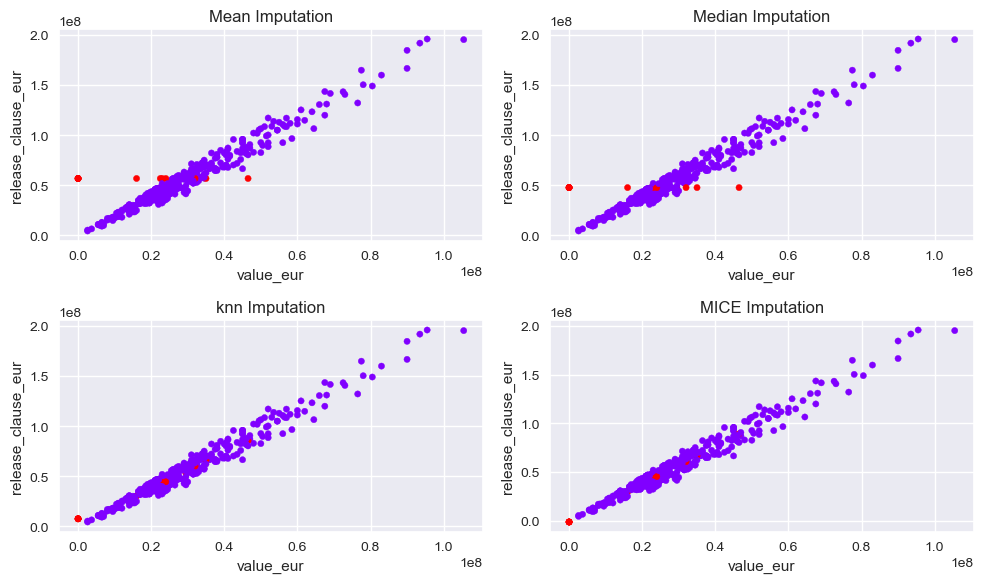

In [1521]:
# filtering out numerical data
fifa_cat_list=list(train_fifa.select_dtypes('object').columns)
fifa_num=train_fifa.drop(columns=fifa_cat_list)

# mean imputation
df_mean = fifa_num.copy()
mean_imputer = SimpleImputer(strategy = "mean")
df_mean.iloc[:,:] = mean_imputer.fit_transform(df_mean)

# median imputation
df_median =fifa_num.copy()
median_imputer = SimpleImputer(strategy = "median")
df_median.iloc[:,:] = median_imputer.fit_transform(df_median)

# KNN imputation
df_knn = fifa_num.copy()
knn_imputer = KNNImputer()
df_knn.iloc[:,:]= knn_imputer.fit_transform(df_knn)

# MICE imputation
df_mice= fifa_num.copy()
mice_imputer = IterativeImputer()
df_mice.iloc[:,:]= mice_imputer.fit_transform(df_mice)

# let's analyse all above imputation results visually
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(10,6))

nullity = train_fifa["release_clause_eur"].isna()
imputations = {"Mean Imputation": df_mean,
               "Median Imputation": df_median,
               "knn Imputation": df_knn,
              "MICE Imputation": df_mice}

for ax, key in zip(ax.flatten(), imputations):
    
    imputations[key].plot(x = "value_eur", y = "release_clause_eur", kind="scatter", 
                             ax=ax, c=nullity, cmap="rainbow", title=key, colorbar=None)
    
    plt.tight_layout();

In [1591]:
fifa_num_imputed=df_mice.copy()

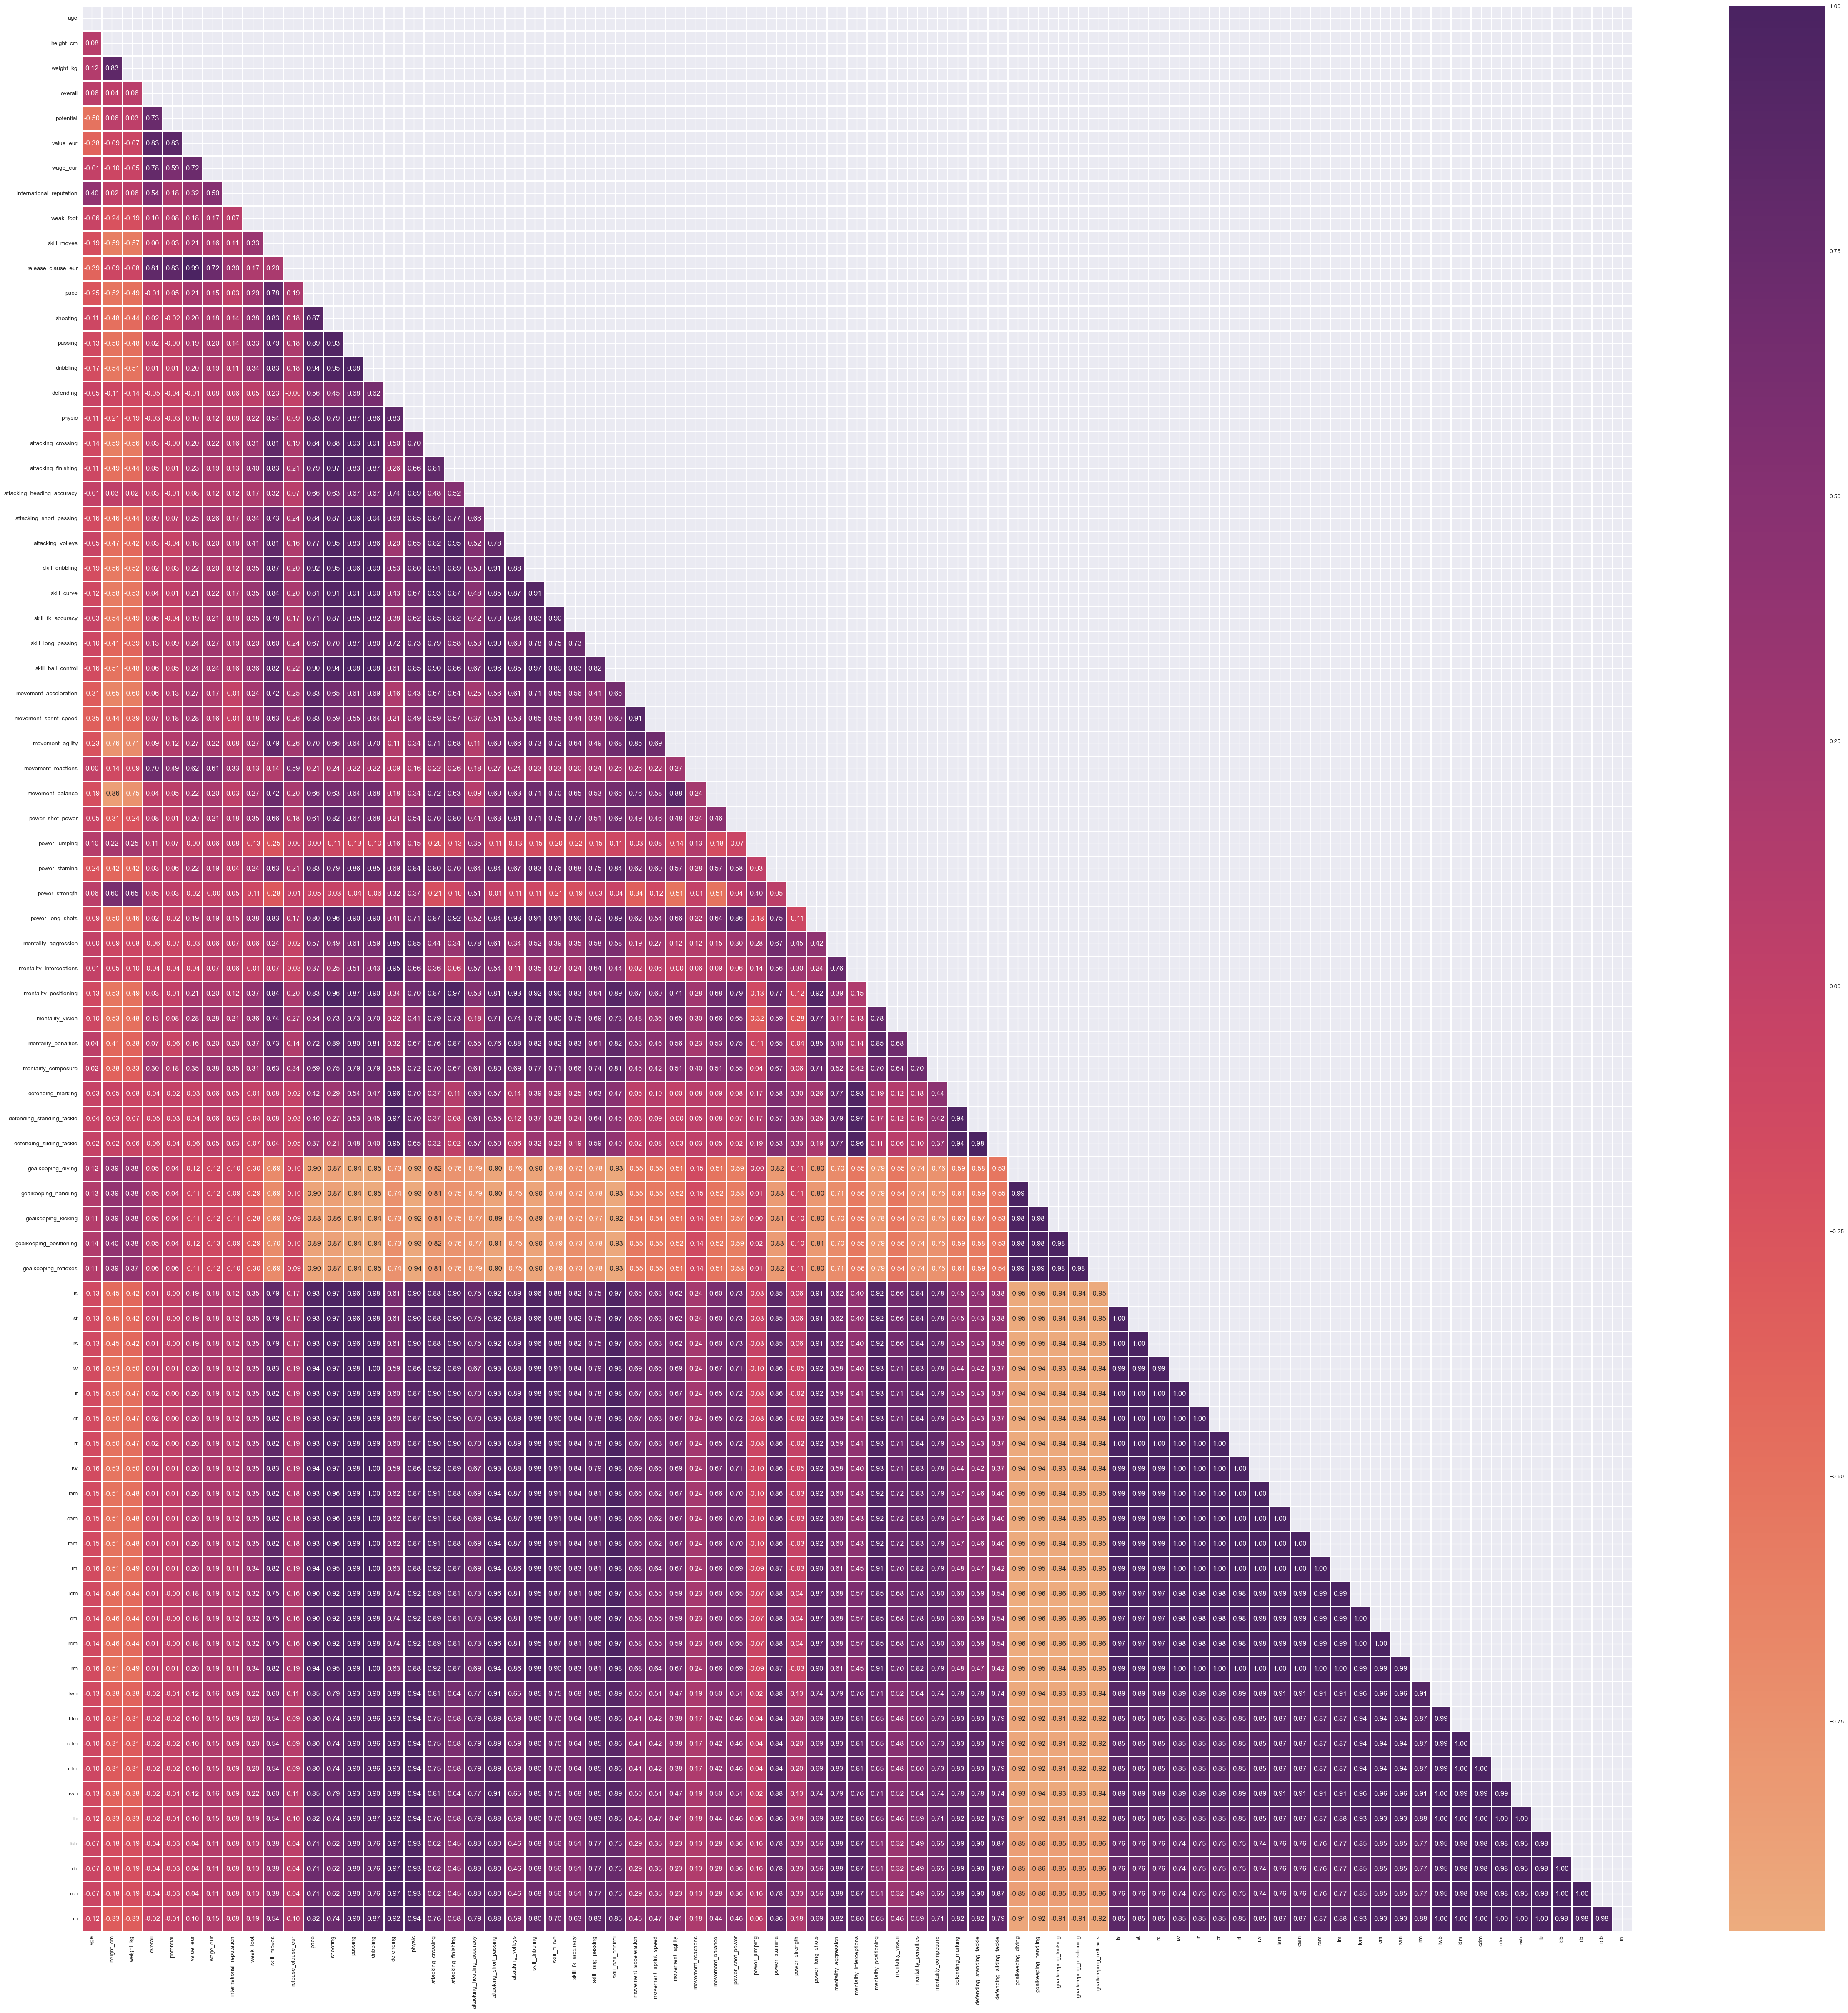

In [1593]:
#correlation
corr= fifa_num_imputed.corr()
mask=np.triu(np.ones_like(corr, dtype=bool))

#heatmap
plt.figure(figsize=(60,60))
sns.heatmap(fifa_num_imputed.corr(), mask=mask, center=0, cmap='flare', linewidths=1, annot=True, fmt='.2f');

### Scaling

In [1595]:
scaler=StandardScaler()
fifa_scaled=scaler.fit_transform(fifa_num_imputed)

### PCA

- Principal Component Analysis (PCA) is a dimensionality reduction technique used to reduce the number of features in a dataset while preserving as much variance as possible.
- PCA achieves this by finding a new set of axes (called principal components) that are linear combinations of the original features.\
- Reduce dimensionality to improve model performance and visualization.
- Handle multicollinearity by transforming correlated features into uncorrelated principal components.
- Capture the most important information (variance) in the dataset.

In [1598]:
pca=PCA()
fifa_pca=pca.fit_transform(fifa_scaled)
pca_comp=PCA(n_components=2)
fifa_pca=pca_comp.fit_transform(fifa_scaled)
#concatenating with original dataset
col_names=['PC1', 'PC2']
new_fifa=pd.concat([fifa_num_imputed.reset_index(drop=True), pd.DataFrame(fifa_pca, columns=col_names)], axis=1)
new_fifa['player_name']=players_data['short_name']
new_fifa.head(3)

age  height_cm  weight_kg  overall  potential  value_eur  wage_eur  \
0   32        170         72       94         94   95500000    565000   
1   34        187         83       93         93   58500000    405000   
2   27        175         68       92         92  105500000    290000   

   international_reputation  weak_foot  skill_moves  release_clause_eur  pace  \
0                         5          4            4         195800000.0  87.0   
1                         5          4            5          96500000.0  90.0   
2                         5          5            5         195200000.0  91.0   

   shooting  passing  dribbling  defending  physic  attacking_crossing  \
0      92.0     92.0       96.0       39.0    66.0                  88   
1      93.0     82.0       89.0       35.0    78.0                  84   
2      85.0     87.0       95.0       32.0    58.0                  87   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       92   
1                   94                          89                       83   
2                   87                          62                       87   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               97           93                 94   
1                 87               89           81                 76   
2                 87               96           88                 87   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0                  92                  96                     91   
1                  77                  92                     89   
2                  81                  95                     94   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                     84                93                  95   
1                     91                87                  96   
2                     89                96                  92   

   movement_balance  power_shot_power  power_jumping  power_stamina  \
0                95                86             68             75   
1                71                95             95             85   
2                84                80             61             81   

   power_strength  power_long_shots  mentality_aggression  \
0              68                94                    48   
1              78                93                    63   
2              49                84                    51   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                       40                     94                94   
1                       29                     95                82   
2                       36                     87                90   

   mentality_penalties  mentality_composure  defending_marking  \
0                   75                   96                 33   
1                   85                   95                 28   
2                   90                   94                 27   

   defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                         37                        26                   6   
1                         32                        24                   7   
2                         26                        29                   9   

   goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0                    11                   15                       14   
1                    11                   15                       14   
2                     9                   15                       15   

   goalkeeping_reflexes  ls  st  rs  lw  lf  cf  rf  rw  lam  cam  ram  lm  \
0                     8  89  89  89  93  93  93  93  93   93   93   93  92   
1                    11  91  91  91  89  90  90  90  89   88   88   88  88   
2                   

### K-Means

- K-Means is a clustering algorithm used to partition data into k clusters based on feature similarity.
- It minimizes the sum of squared distances between data points and their corresponding cluster centroids.

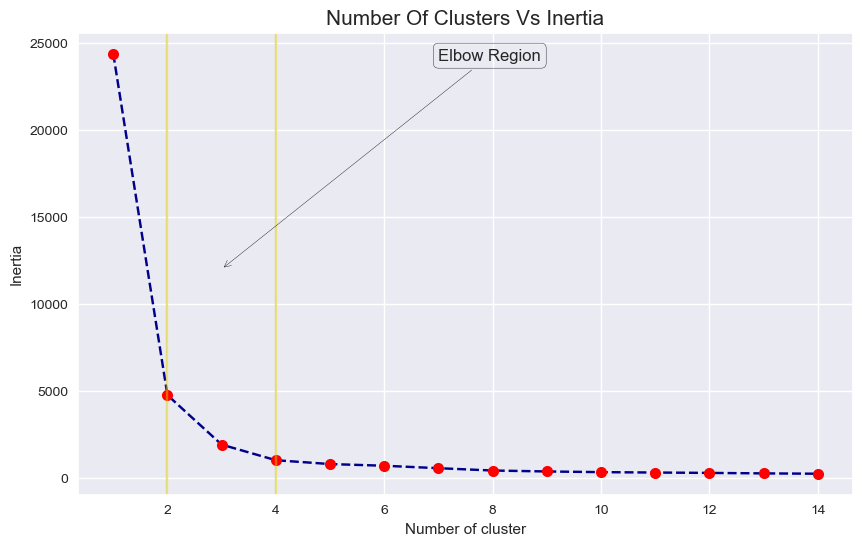

In [1601]:
wcss=[]

for k in range(1,15):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(fifa_pca)
    inertia=kmeans.inertia_
    wcss.append(inertia)

#plotting graph
plt.figure(figsize=(10,6))
plt.plot(range(1,15), wcss, color='darkblue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=8)
plt.axvline(2, alpha=0.5, color='y')
plt.axvline(4, alpha=0.5, color='y')
plt.annotate('Elbow Region', (3, 12000), (7, 24000),
            arrowprops=dict(arrowstyle="->",connectionstyle="Arc3", color="k"),
            bbox = dict(boxstyle = "round", fc ="none", ec="k"))
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.title('Number of clusters vs Inertia'.title(), fontsize=15);

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

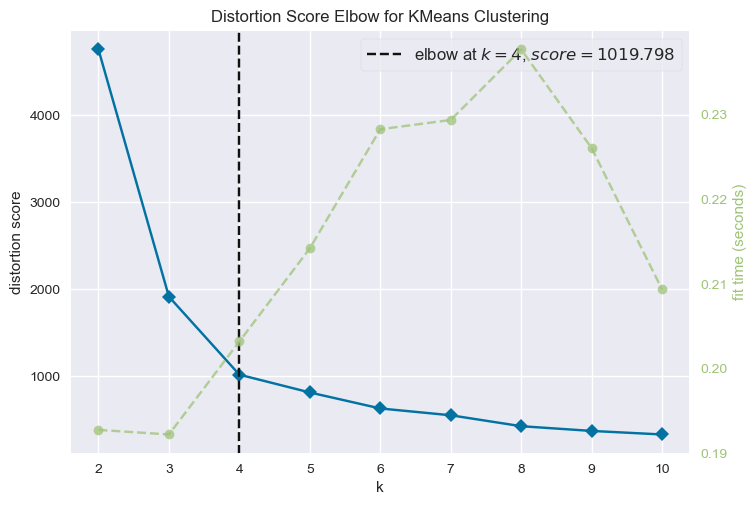

In [1602]:
visualizer3 = KElbowVisualizer(KMeans(), k=(2,11))

visualizer3.fit(fifa_pca) # Fit the data to the visualizer
visualizer3.show(outpath='elbowplot2.png')

In [1603]:
def plot_clusters(num_clusters):

    """
    Plot clusters of FIFA player data using KMeans clustering algorithm.

    Parameters:
    num_clusters (int): Number of clusters to use for KMeans clustering.

    """
    kmeans2=KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    kmeans2.fit(fifa_pca)
    #Adding labels to new_fifa dataframe
    new_fifa['labels']=kmeans2.labels_

    sub_data=new_fifa[new_fifa['overall']>80]
    plt.figure(figsize=(20,15))
    sns.scatterplot(x='PC1', y='PC2', hue='labels', palette='tab10', data=sub_data)

    for index, row in new_fifa.iterrows():
        if row['overall']>85:
            plt.annotate(row['player_name'], xy=(row['PC1'], row['PC2']), xytext=(row['PC1']+1, row['PC2']+1), textcoords='offset points',
                ha='left', va='top', fontsize=12, bbox=dict(facecolor='white', edgecolor='gray', alpha=0.7), 
                arrowprops=None)

For n_clusters = 2 The average silhouette_score is : 0.8070311870167561
For n_clusters = 3 The average silhouette_score is : 0.5676236624701034
For n_clusters = 4 The average silhouette_score is : 0.5635741527306429
For n_clusters = 5 The average silhouette_score is : 0.5025280597942102
For n_clusters = 6 The average silhouette_score is : 0.48328893225235414


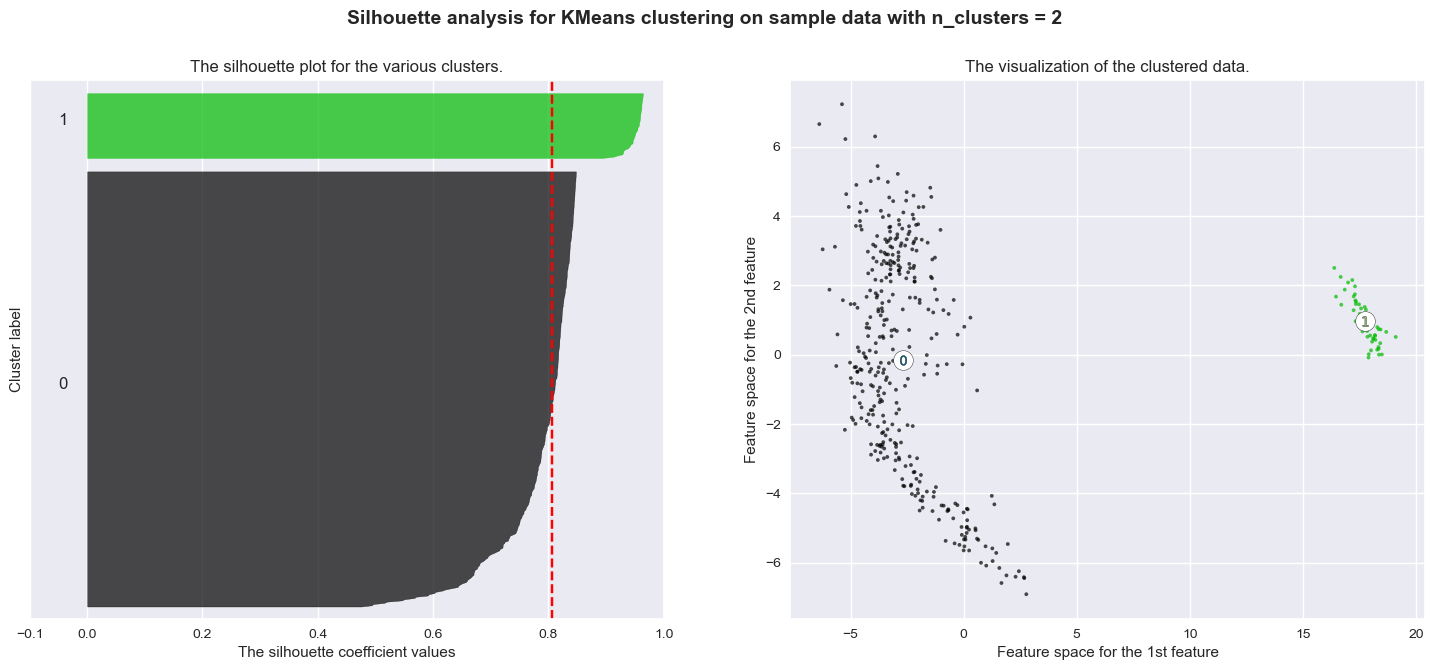

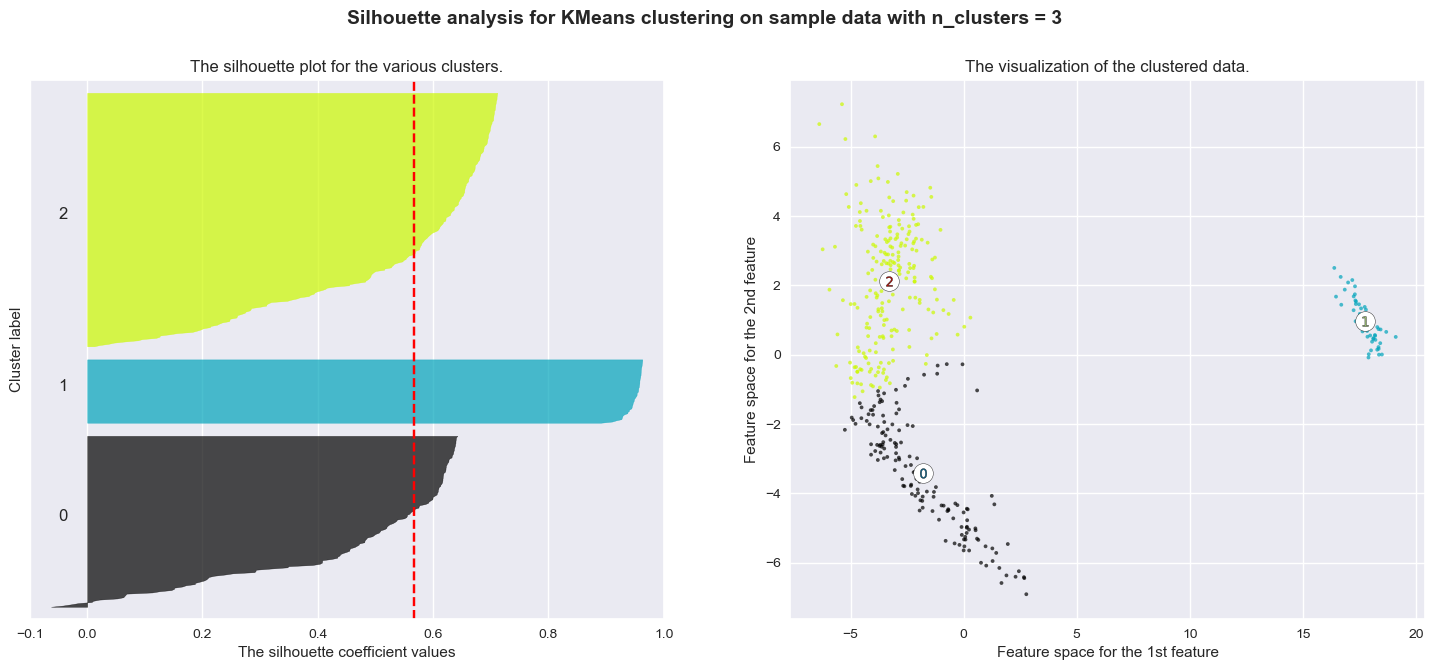

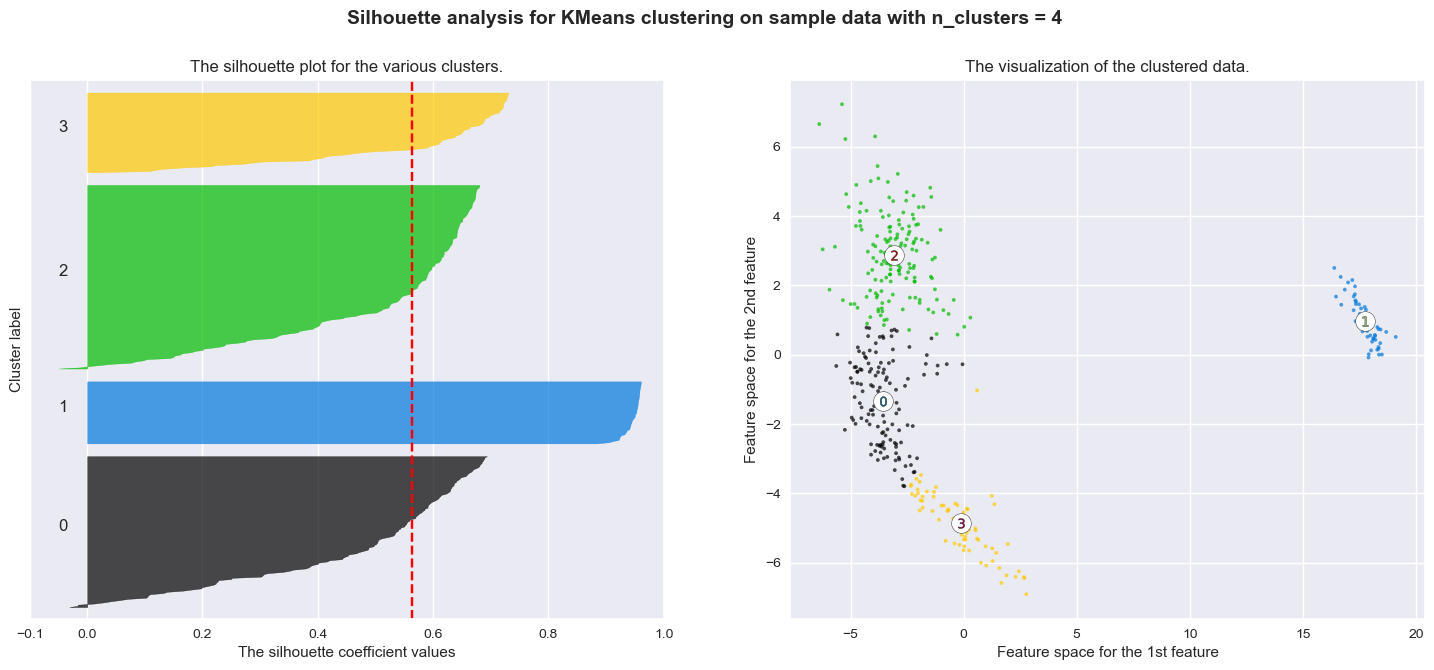

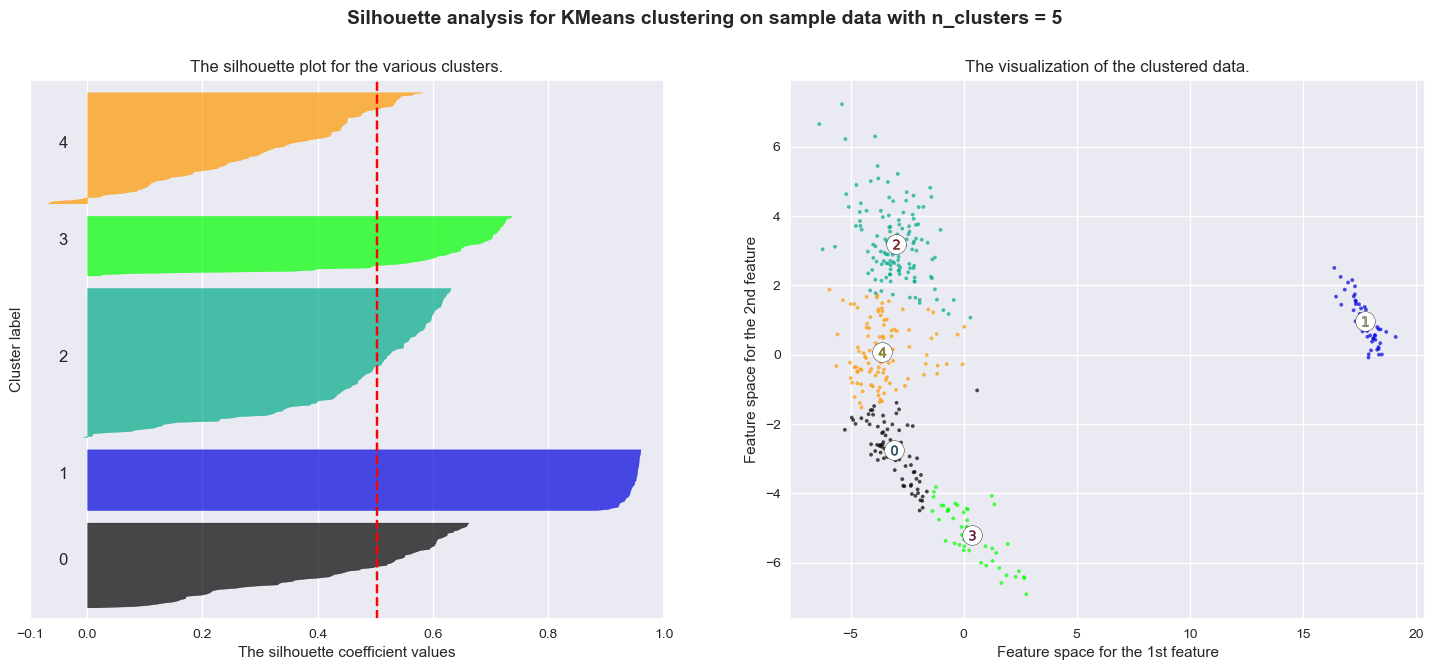

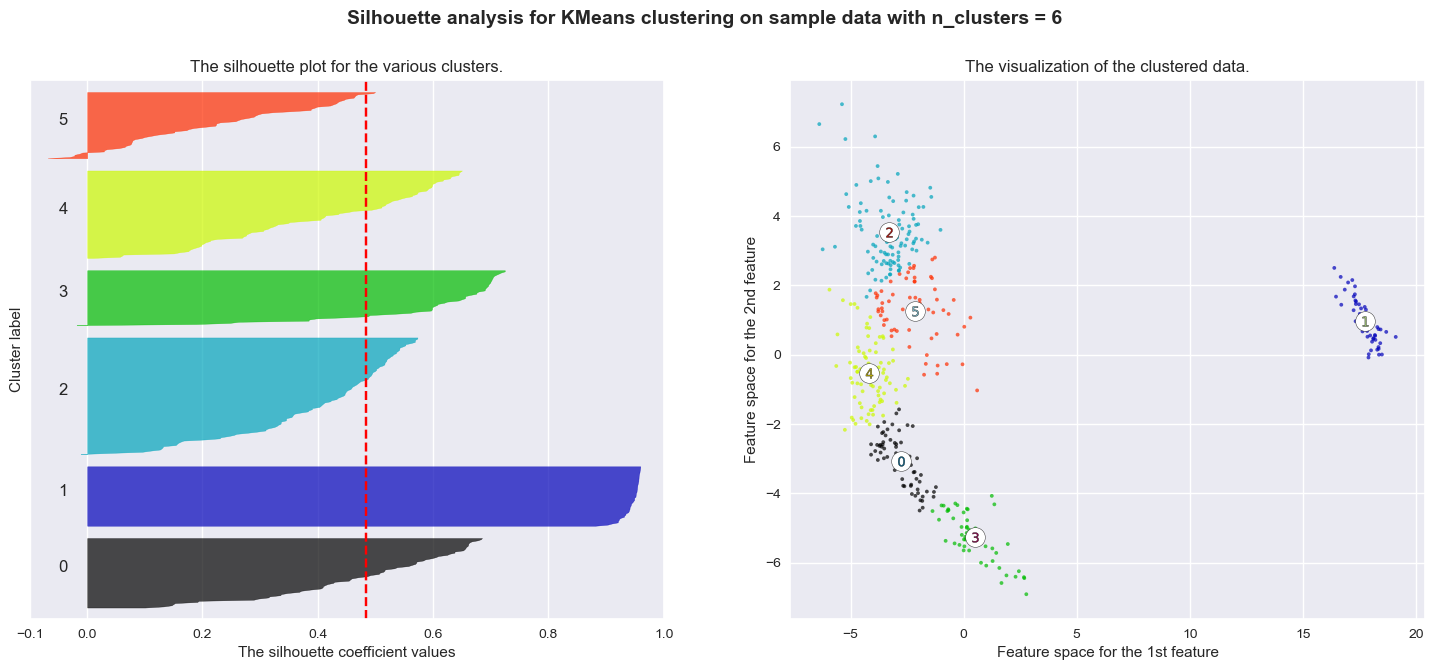

In [1604]:
range_n_clusters = [2, 3, 4, 5,6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(fifa_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(fifa_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(fifa_pca, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(fifa_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
    new_fifa['PC1'], new_fifa['PC2'], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

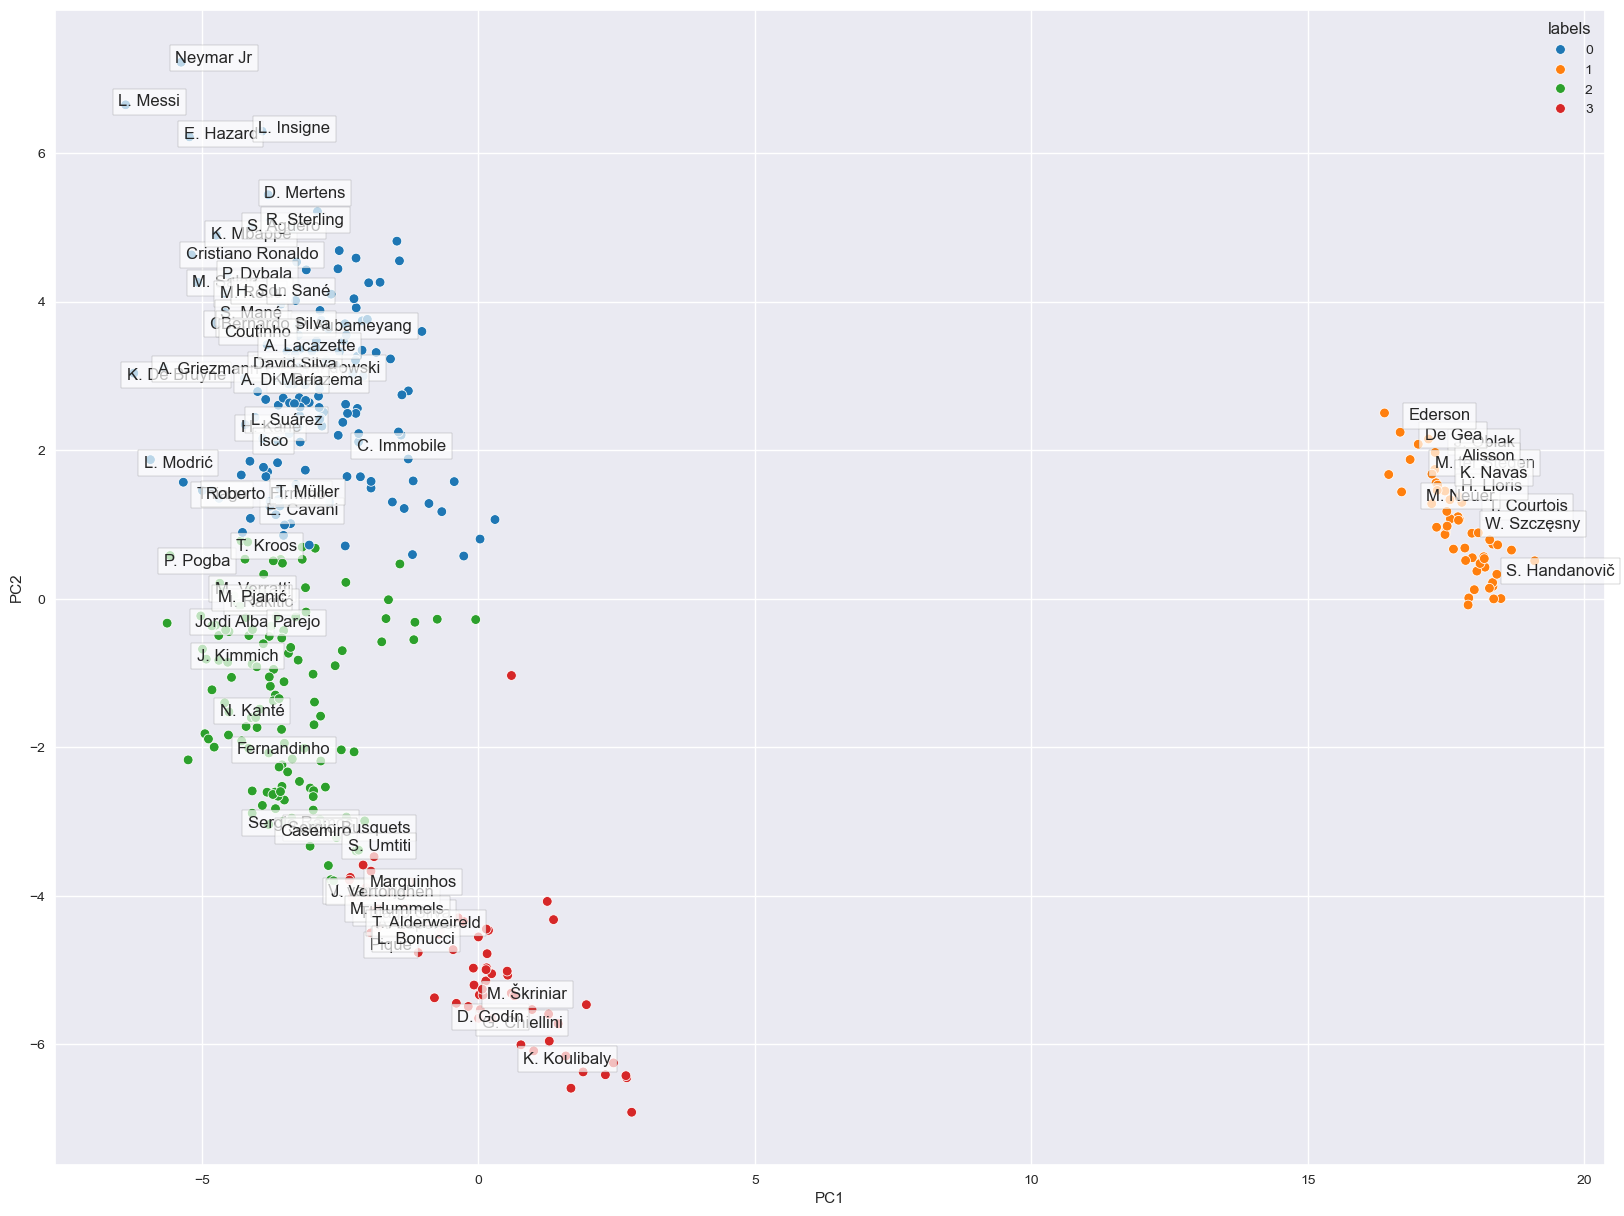

In [1617]:
plot_clusters(4)

In [1619]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=5).fit(fifa_pca)
labels = db.labels_

# Step 3: Identify unique clusters and noise
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

# Step 4: Plot the results
plt.figure(figsize=(10, 7))
for k, col in zip(unique_labels, colors):
    if k == -1:  # Noise points are labeled as -1
        col = [0, 0, 0, 1]  # Black color for noise

    # Extract data points for the current cluster
    class_member_mask = (labels == k)
    xy = data[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col[:3]), markeredgecolor='k', markersize=8)

plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

TypeError: unhashable type: 'numpy.ndarray'

<Figure size 1000x700 with 0 Axes>

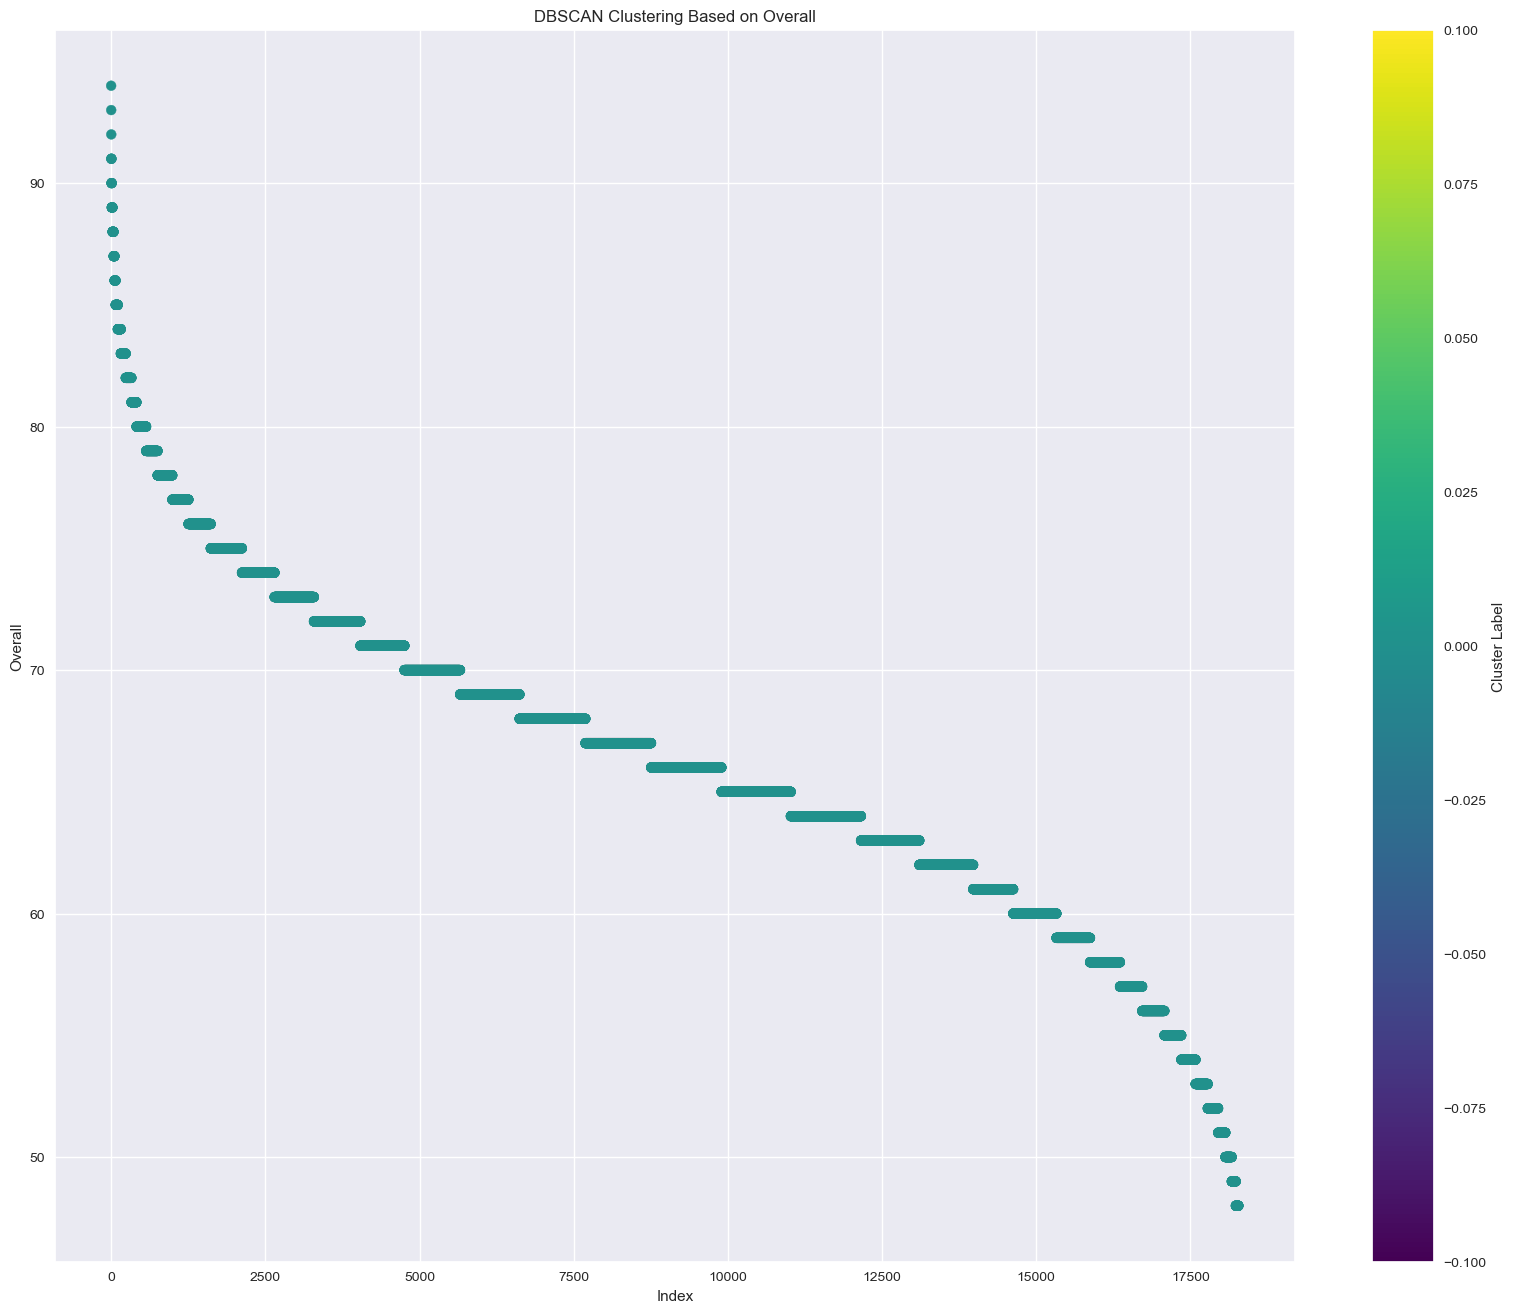

In [1631]:
data = players_data[['overall']].values

# Step 3: Apply DBSCAN clustering
dbscan = DBSCAN(eps=2, min_samples=5)  # Tune eps and min_samples as needed
clusters = dbscan.fit_predict(data)

# Step 4: Add cluster labels to the dataset
players_data['short_name'] = clusters

# Step 5: Visualize the clusters
plt.figure(figsize=(20, 16))
plt.scatter(players_data.index, players_data['overall'], c=clusters, cmap='viridis', s=50)
plt.colorbar(label='Cluster Label')
plt.xlabel('Index')
plt.ylabel('Overall')
plt.title('DBSCAN Clustering Based on Overall')
plt.show()

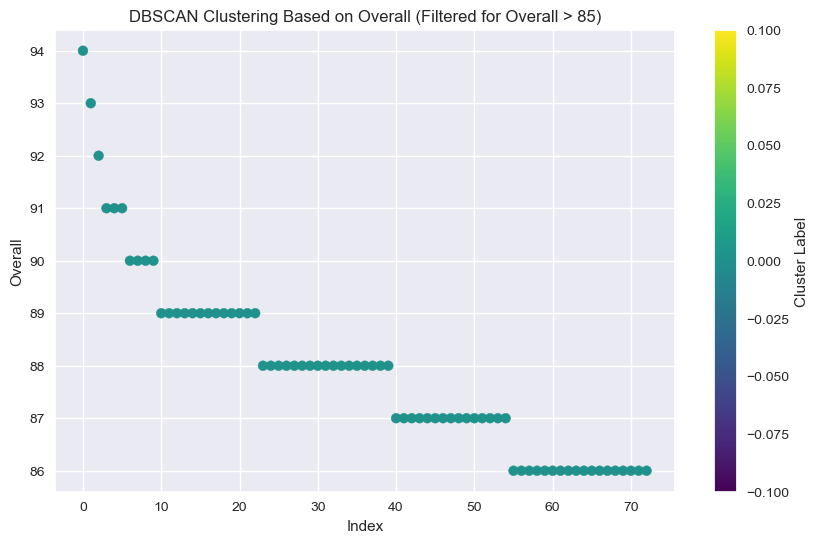

In [1627]:
filtered_data = players_data[players_data['overall'] > 85]

# Step 2: Extract "Overall" values for clustering
data = filtered_data[['overall']].values

# Step 3: Apply DBSCAN clustering
dbscan = DBSCAN(eps=2, min_samples=5)  # Tune eps and min_samples as needed
clusters = dbscan.fit_predict(data)

# Step 4: Add cluster labels to the filtered dataset
filtered_data['cluster_label'] = clusters

# Step 5: Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data.index, filtered_data['overall'], c=clusters, cmap='viridis', s=50)
plt.colorbar(label='Cluster Label')
plt.xlabel('Index')
plt.ylabel('Overall')
plt.title('DBSCAN Clustering Based on Overall (Filtered for Overall > 85)')
plt.show()